Demo napari visualization modes in image layer.

napari version 0.4.13

## Create demo images

Generate 3D spheres to demo napari rendering:

- uni_ball: 3D sphere with unified intensity
- grad_ball: 3D sphere with gradient intensity, with highest intensity at the center
- u_ball/l_ball: grad_ball shifted to upper/lower positions 

In [17]:
from skimage.morphology import ball
import numpy as np

int_scale = 200
radius = 51

uni_ball = ball(radius)*int_scale

grad_ball = np.zeros(uni_ball.shape)
for i in range(1,radius,2):
    sub_ball = ball(i)
    pad_wdth = int((uni_ball.shape[0]-sub_ball.shape[0])/2)
    sub_ball = np.pad(sub_ball,pad_wdth,mode='constant')
    grad_ball += sub_ball

grad_ball = grad_ball*(int_scale/np.max(grad_ball))

ext = np.zeros((grad_ball.shape[0],int(grad_ball.shape[1]/2),grad_ball.shape[2]))
u_ball = np.concatenate((grad_ball,ext),axis=1)
l_ball = np.concatenate((ext,grad_ball),axis=1)

In [18]:
import napari
from napari.utils import nbscreenshot

'''
viewer.add_image(uni_ball, name='uni_ball', colormap='gray')
viewer.add_image(grad_ball, name='grad_ball', colormap='gray')
viewer.add_image(uni_ball, name='red_ball', colormap='red')
viewer.add_image(uni_ball, name='green_ball', colormap='green')
viewer.add_image(u_ball, name='upper_ball')
viewer.add_image(l_ball, name='lower_ball')

#grid view for side by side comparison
viewer.grid.enabled = True
viewer.camera.zoom = 1
viewer.camera.center = (0,0,0)

#clear layers
viewer.layers.clear()
'''

"\nviewer.add_image(uni_ball, name='uni_ball', colormap='gray')\nviewer.add_image(grad_ball, name='grad_ball', colormap='gray')\nviewer.add_image(uni_ball, name='red_ball', colormap='red')\nviewer.add_image(uni_ball, name='green_ball', colormap='green')\nviewer.add_image(u_ball, name='upper_ball')\nviewer.add_image(l_ball, name='lower_ball')\n\n#grid view for side by side comparison\nviewer.grid.enabled = True\nviewer.camera.zoom = 1\nviewer.camera.center = (0,0,0)\n\n#clear layers\nviewer.layers.clear()\n"

## Interpolation
Selects a preset interpolation mode in vispy that determines how volume is displayed. Makes use of the two Texture2D interpolation methods and the available interpolation methods defined in vispy/glsl/misc/spatial-filters.frag 

See Vispy documentation:
https://www.ssec.wisc.edu/~davidh/tmp/vispy/api/vispy.glsl.build_spatial_filters.html

### nearest (2D/3D)
No filter (smoothing) is applied. Displays the intensity value of the nearest pixel.

### linear (3D only)
?? can't find it in API reference

### bilinear (2D only)
Applies intensity interpolation with filter radius = 1.0.

### bicubic (2D only)
Applies intensity interpolation with filter radius = 2.0. More aggresive smoothing compared to bilinear mode.

### kaiser (2D only)
?? when to use this mode
### spline36 (2D only)
?? when to use this mode

* Additional interpolation methods can be accessed from API: https://napari.org/api/stable/napari.layers.Image.html?highlight=interpolation#napari.layers.Image.interpolation


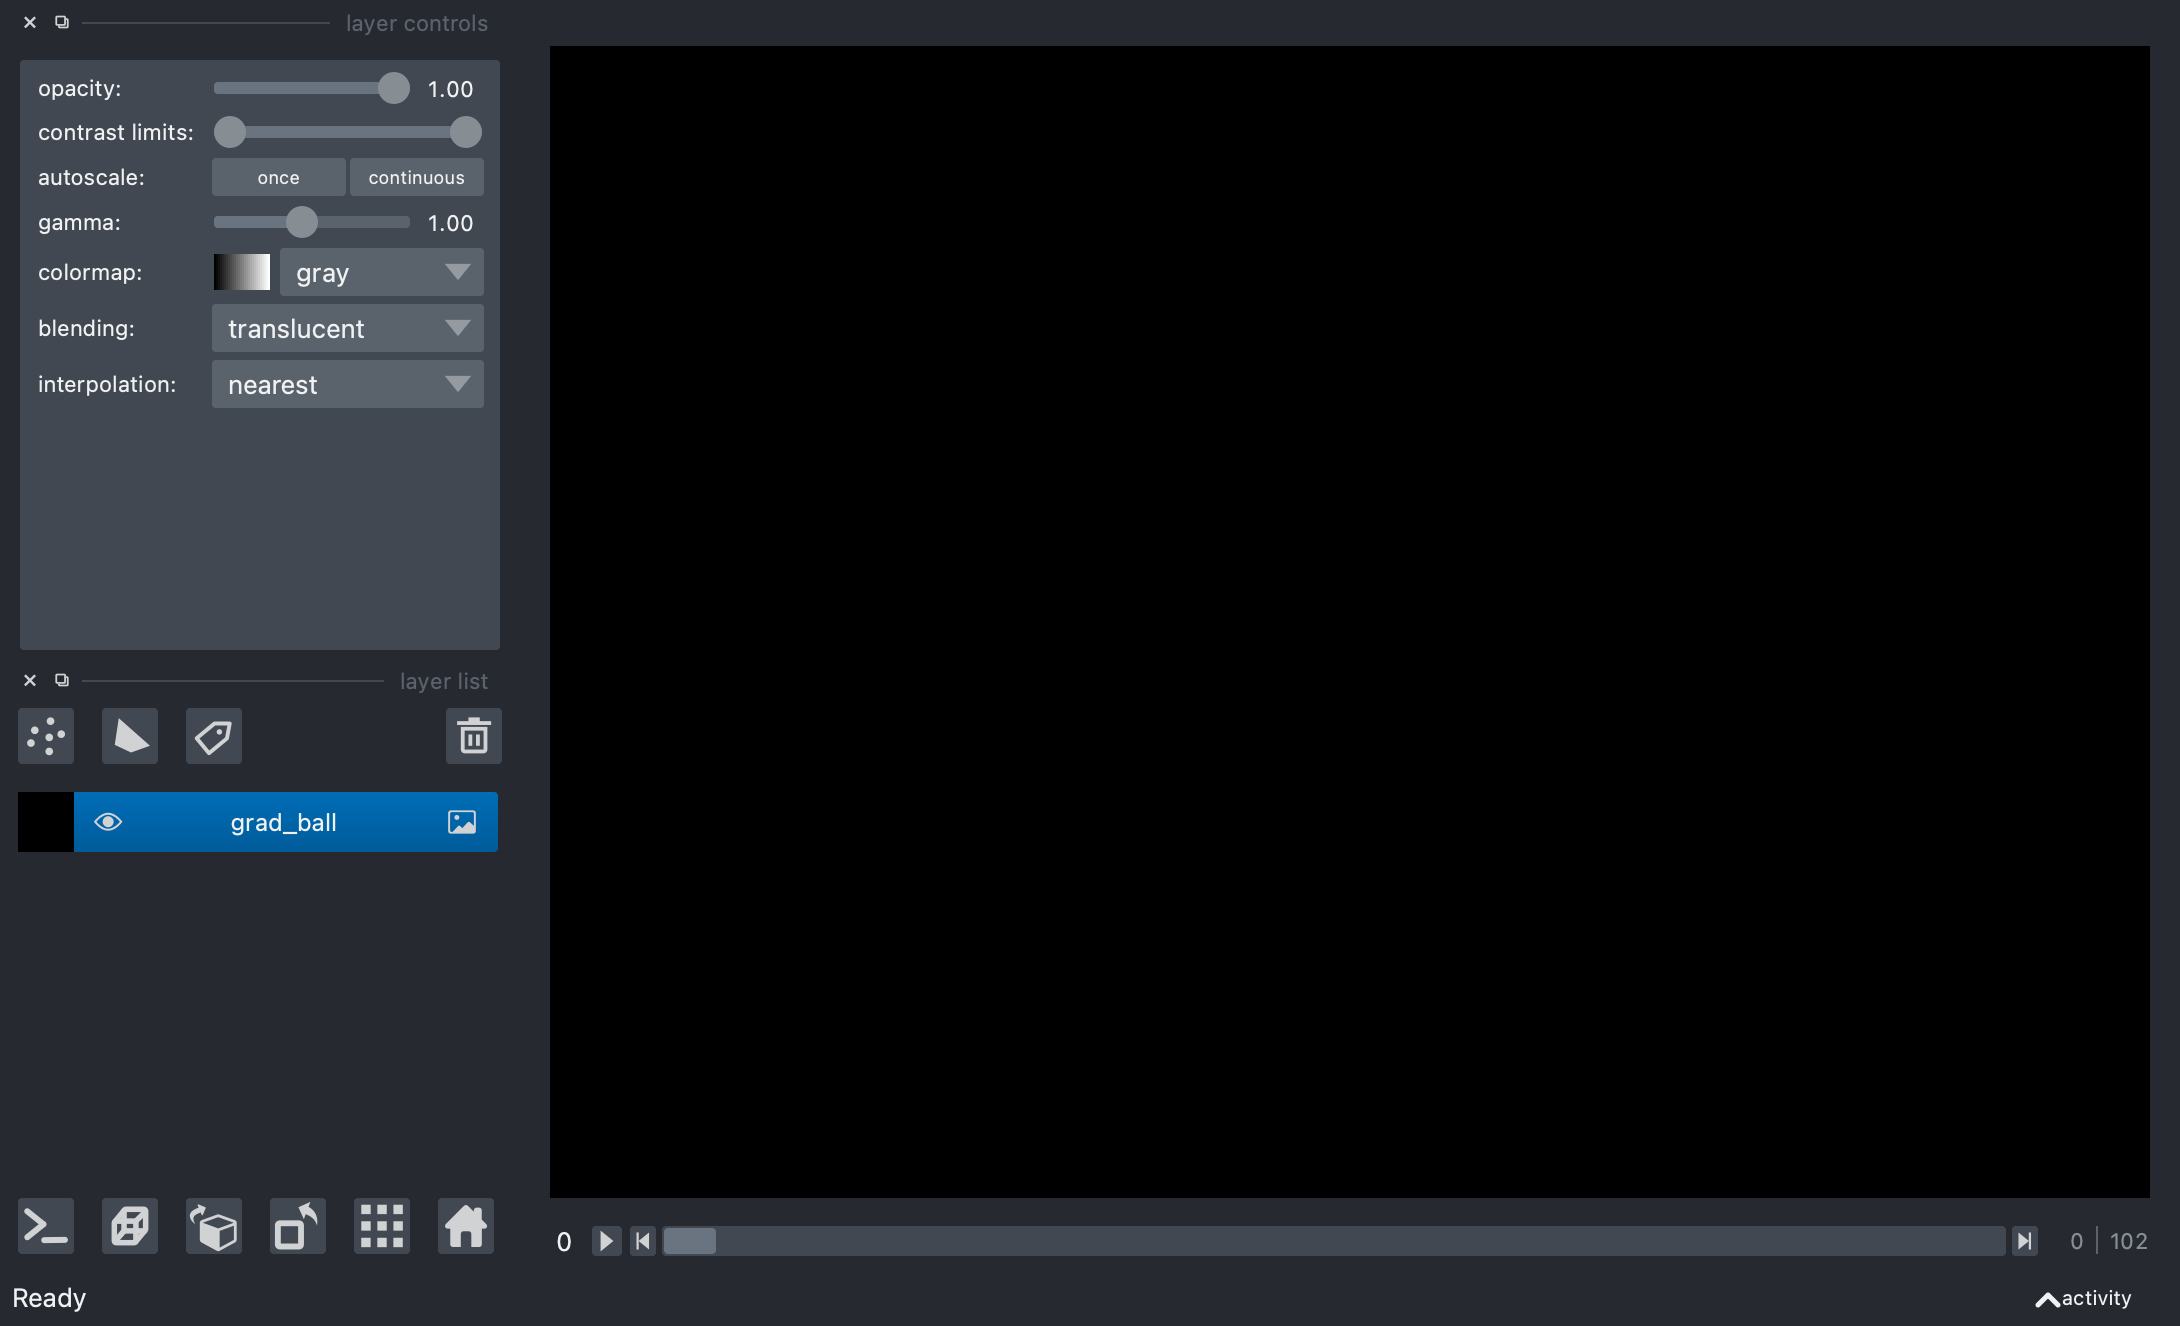

In [19]:
viewer = napari.Viewer(ndisplay=2)
grad = viewer.add_image(grad_ball, name='grad_ball', colormap='gray')
viewer.camera.zoom = 10
grad.interpolation='nearest'
nbscreenshot(viewer)

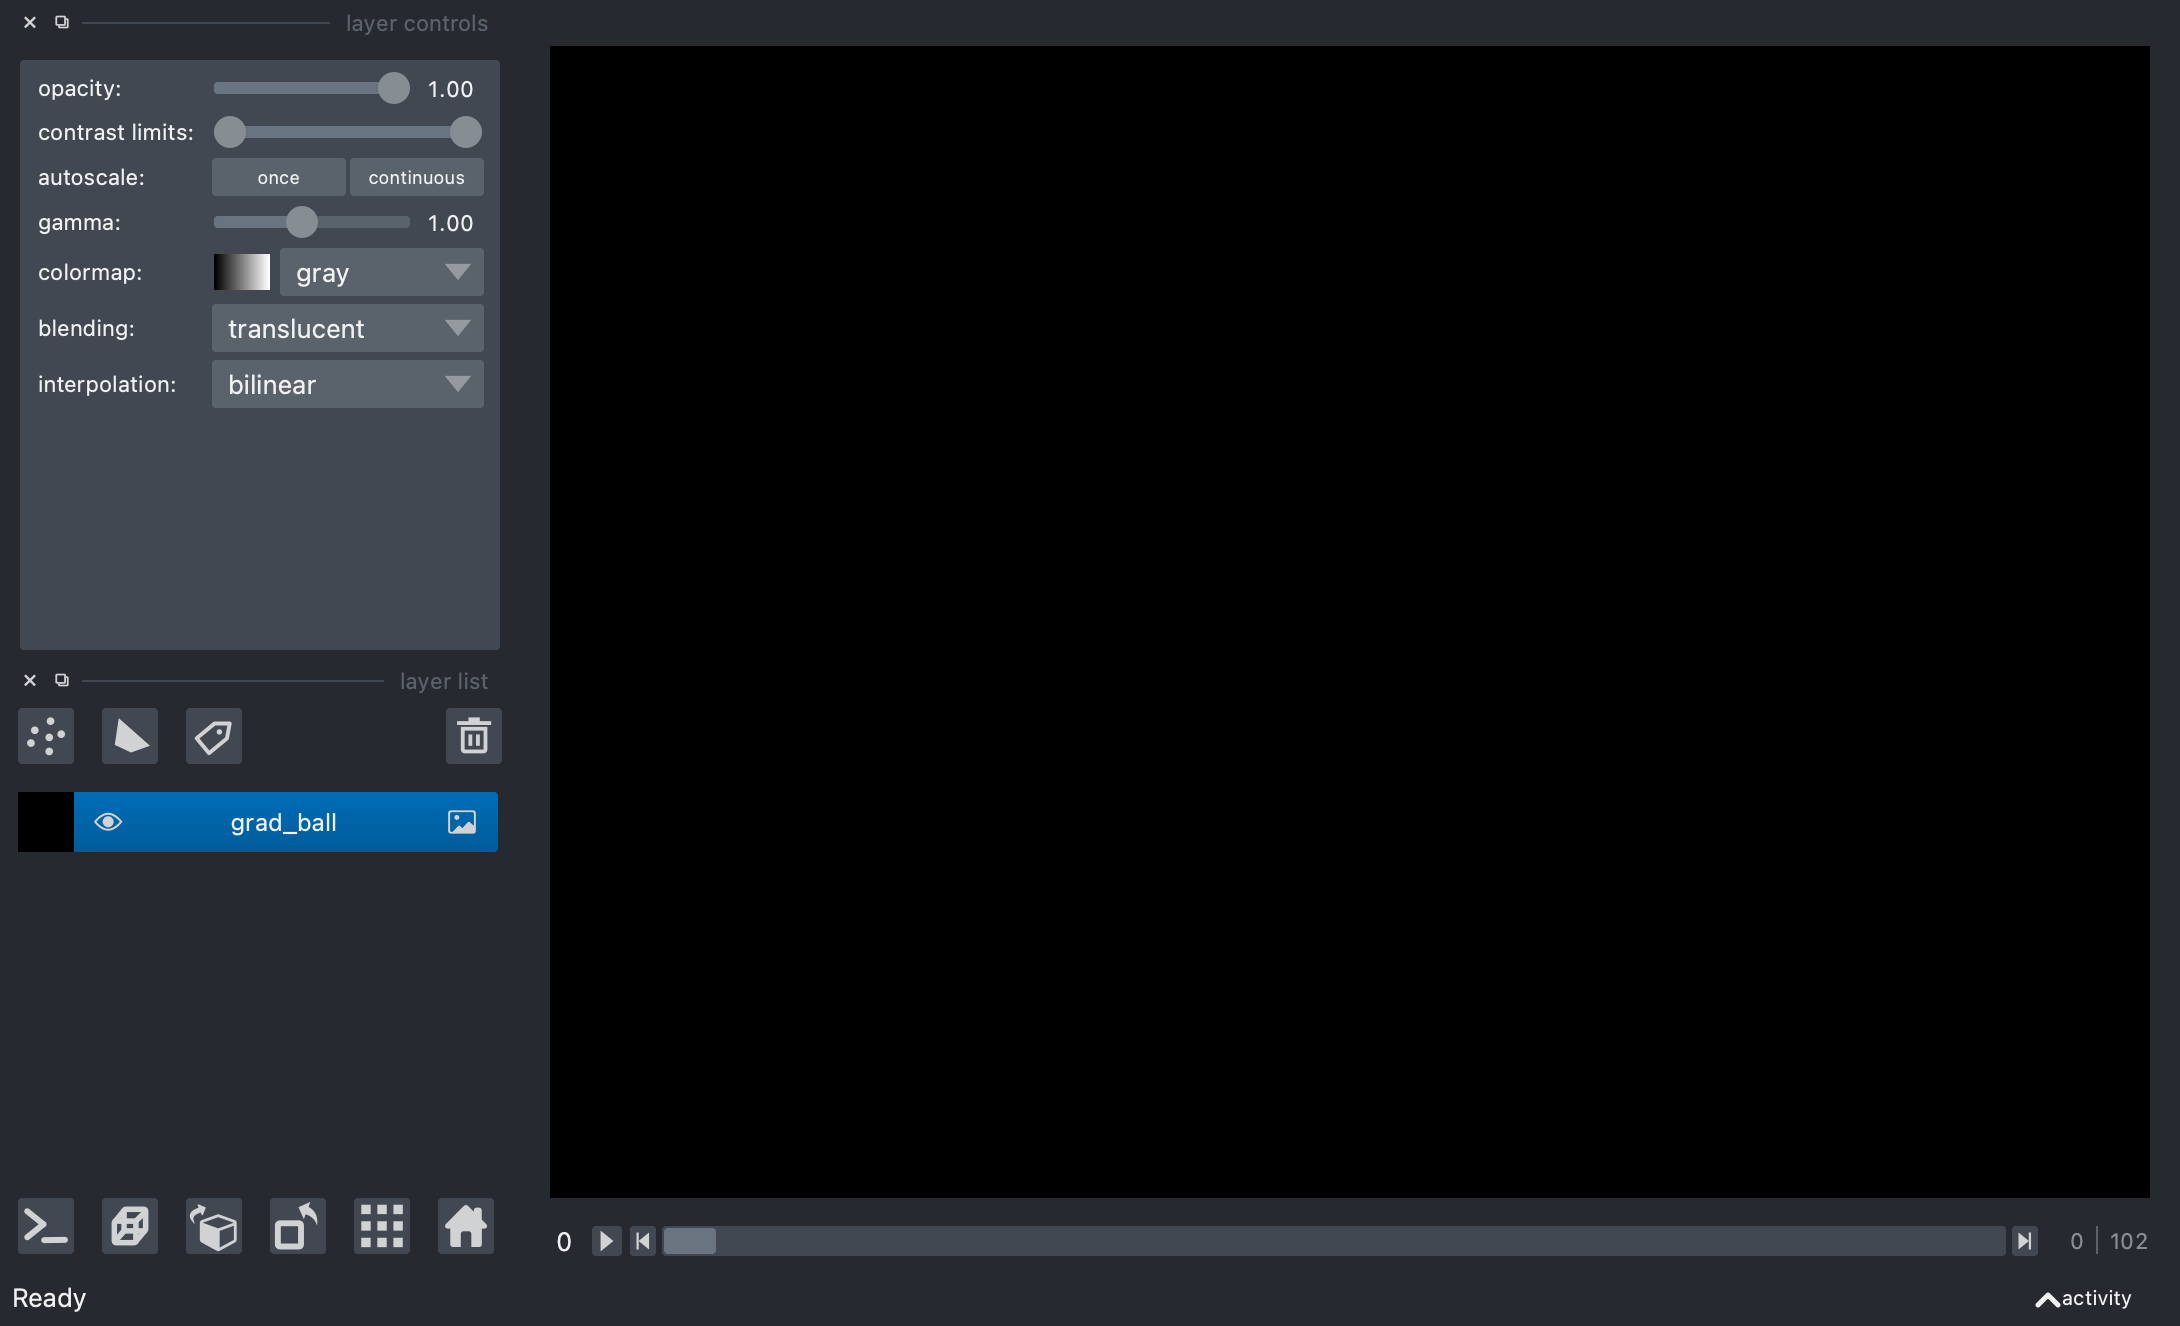

In [20]:
grad.interpolation = 'bilinear'
nbscreenshot(viewer)

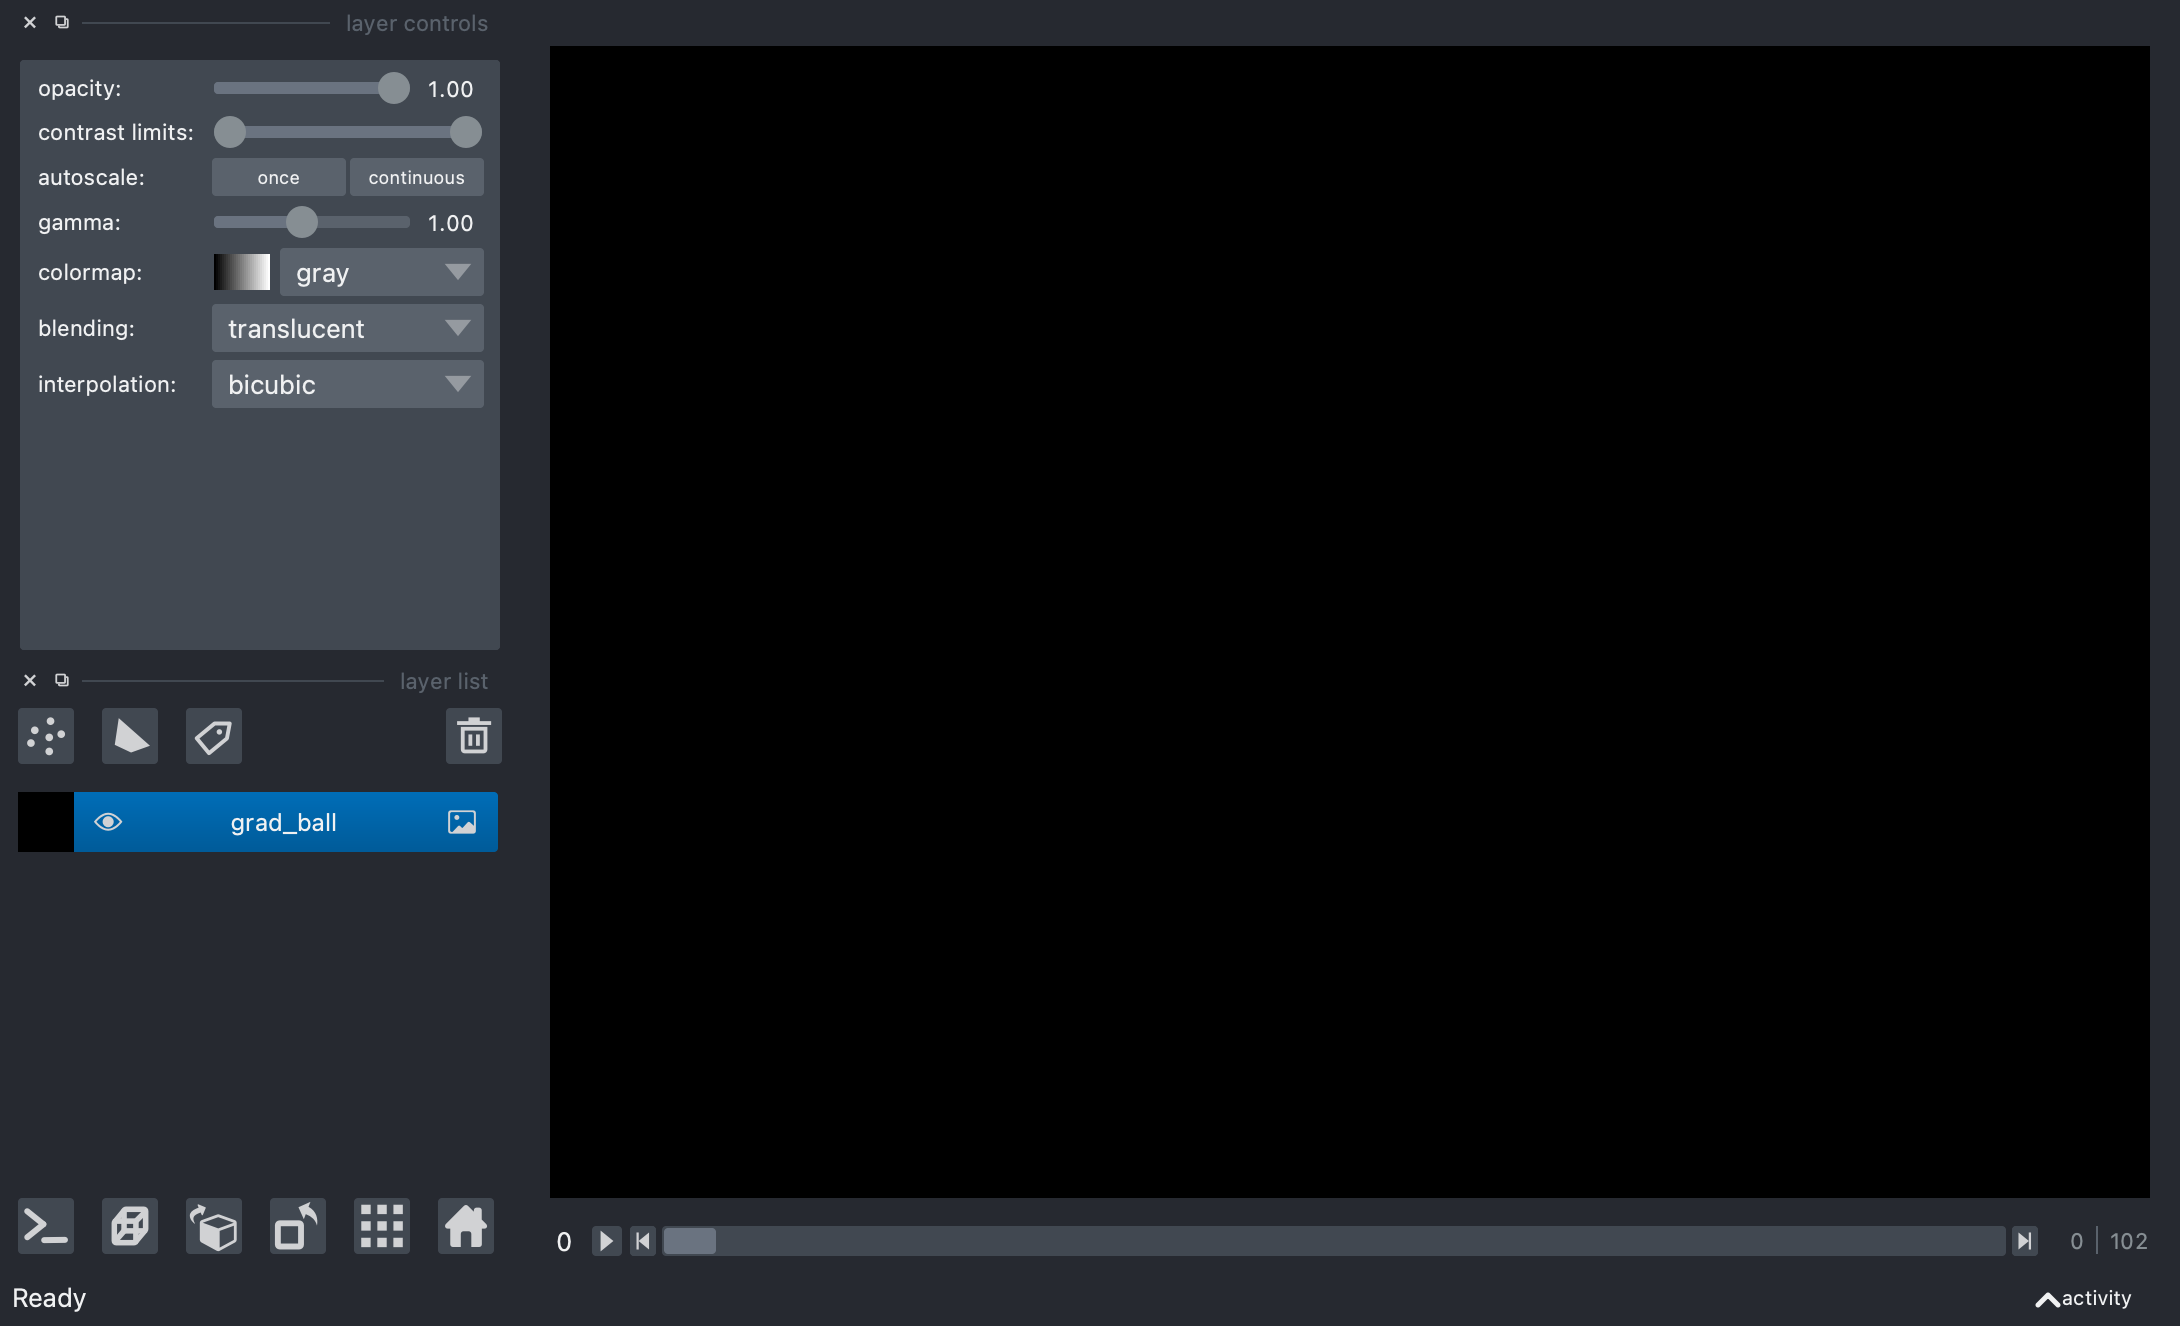

In [21]:
grad.interpolation = 'bicubic'
nbscreenshot(viewer)

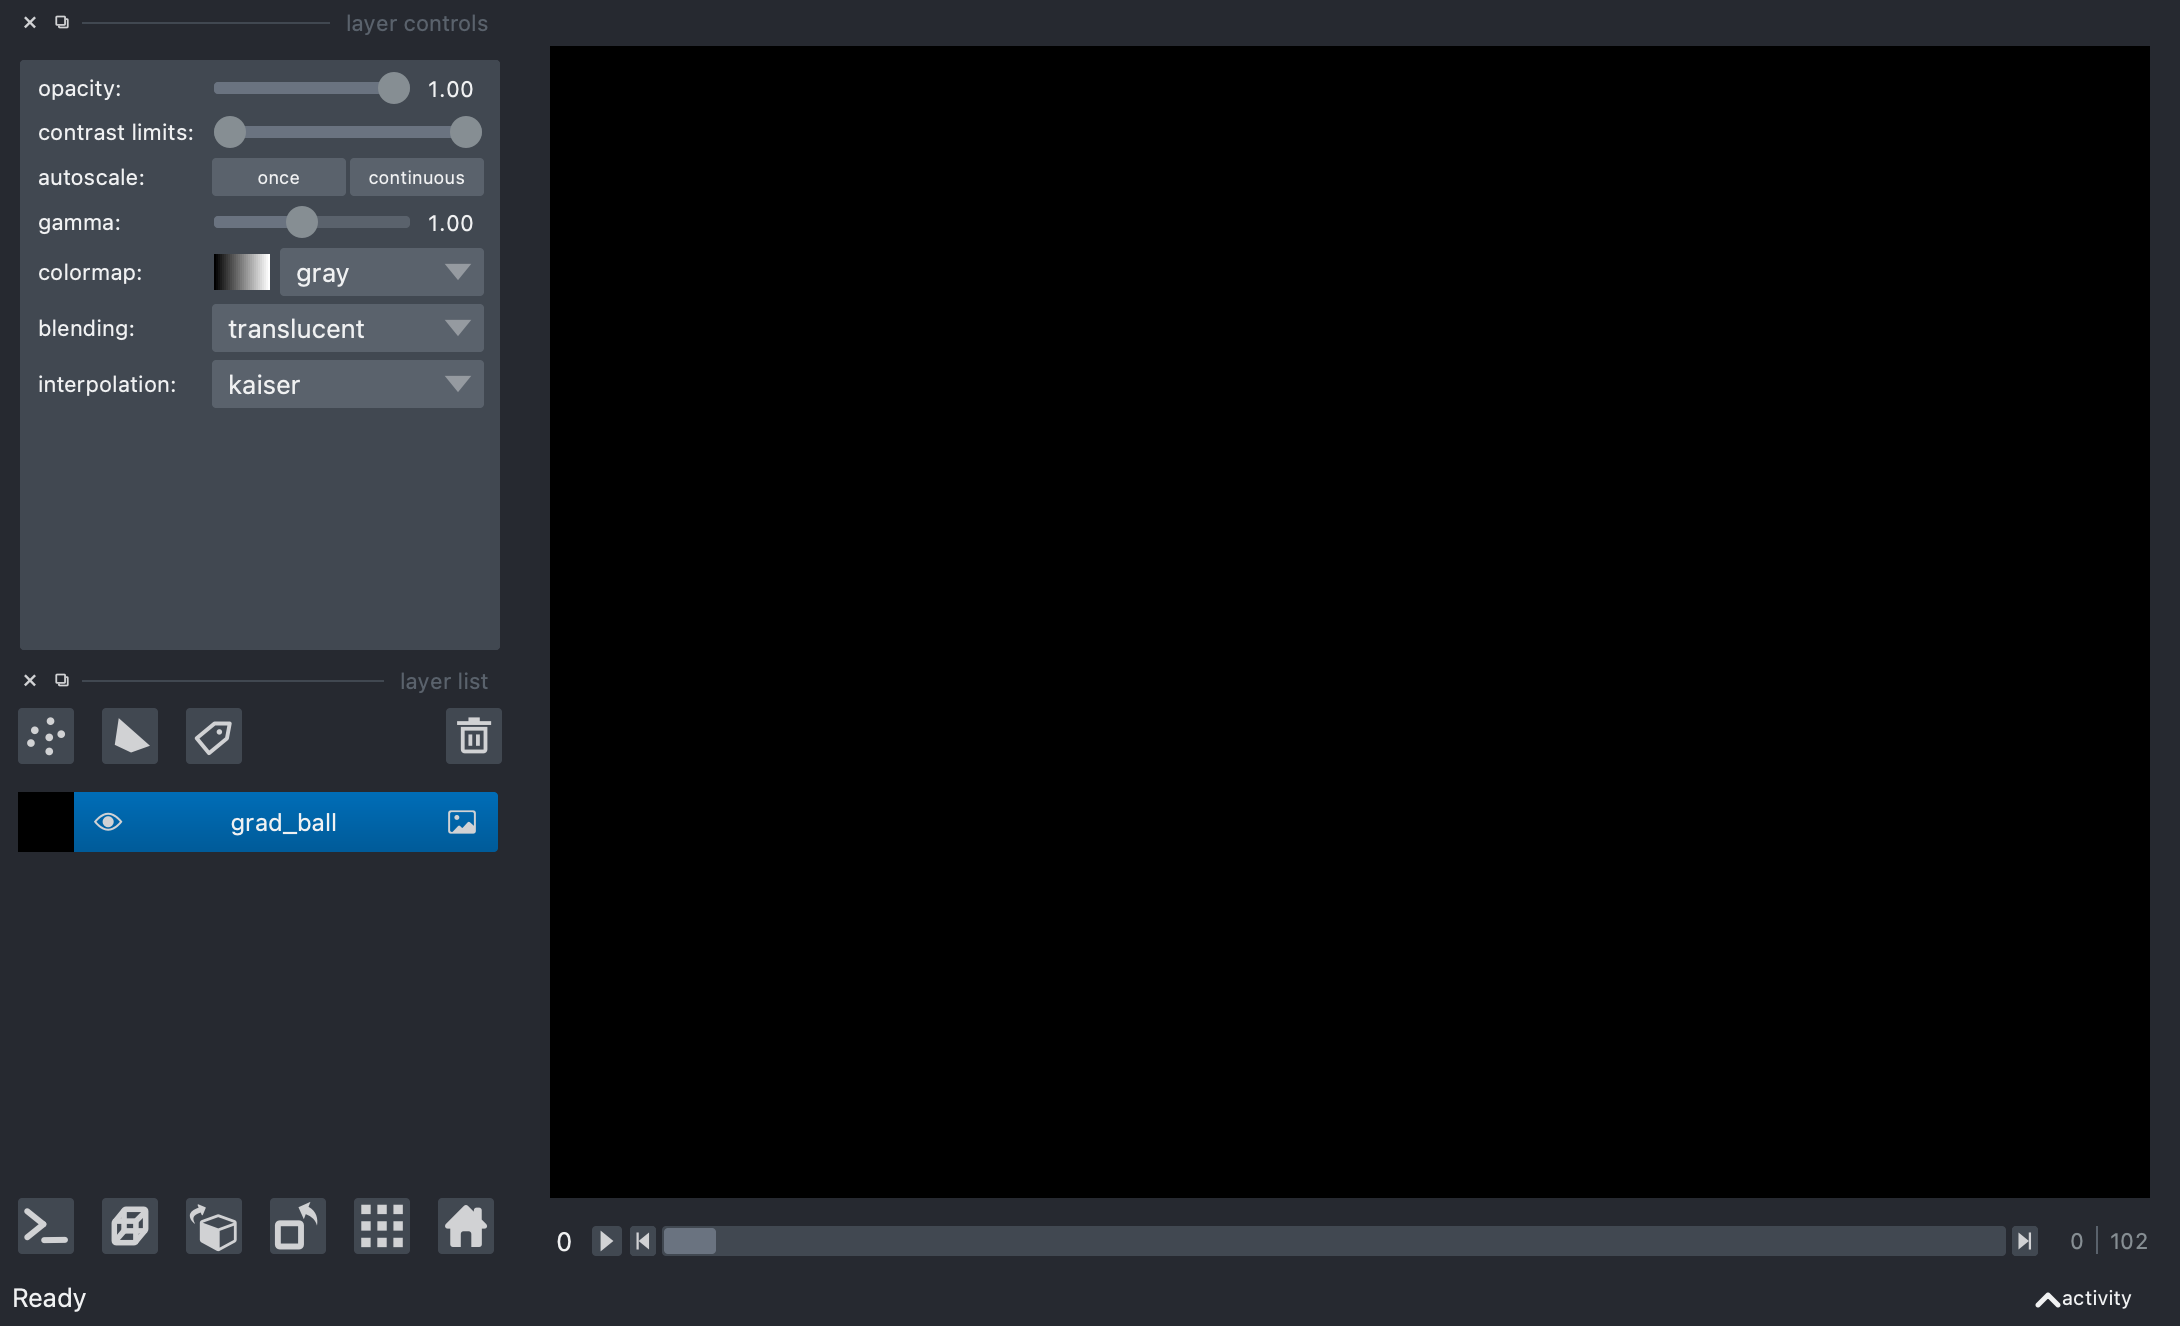

In [22]:
grad.interpolation = 'kaiser'
nbscreenshot(viewer)

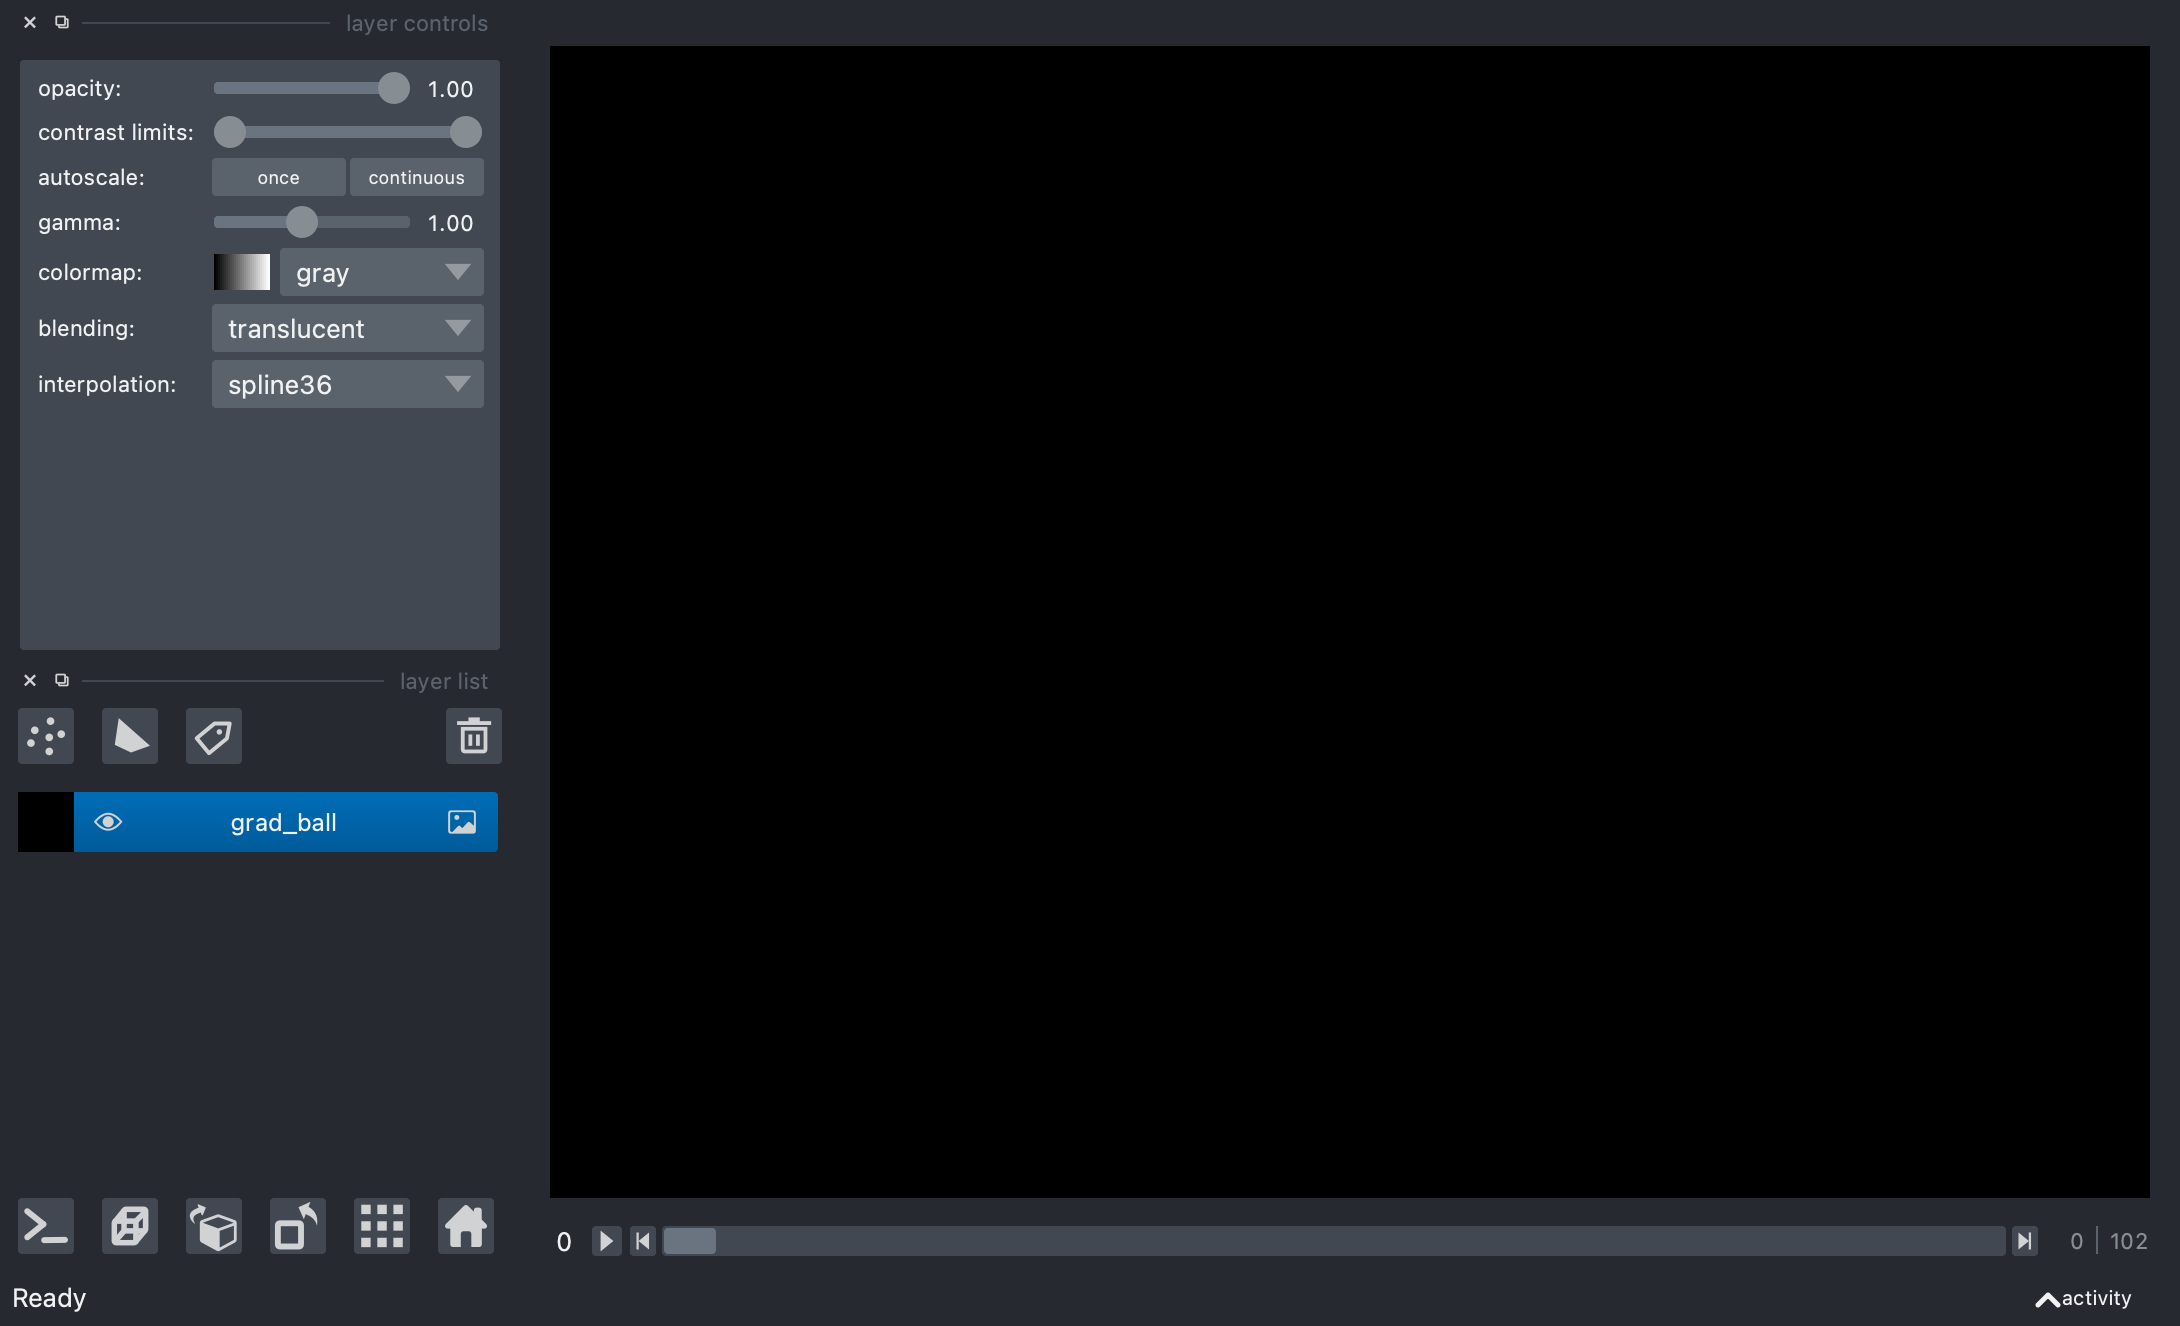

In [23]:
grad.interpolation = 'spline36'
nbscreenshot(viewer)

## Rendering
affects 3D rendering

### translucent
voxel colors are blended along the view ray until the result is opaque.

### additive
voxel colors are added along the view ray until the result is saturated.

### iso
isosurface. Cast a ray until a certain threshold is encountered. At that location, lightning calculations are performed to give the visual appearance of a surface.

### mip
maximum intensity projection. Cast a ray and display the maximum value that was encountered.

### minip
minimum intensity projection. Cast a ray and display the minimum value that was encountered.

### attenuated_mip
attenuated maximum intensity projection. Cast a ray and attenuate values based on integral of encountered values, display the maximum value that was encountered after attenuation. This will make nearer objects appear more prominent.

### average
average intensity projection. Cast a ray and display the average of values that were encountered.

* API reference: https://napari.org/api/stable/napari.layers.Image.html#napari.layers.Image.rendering


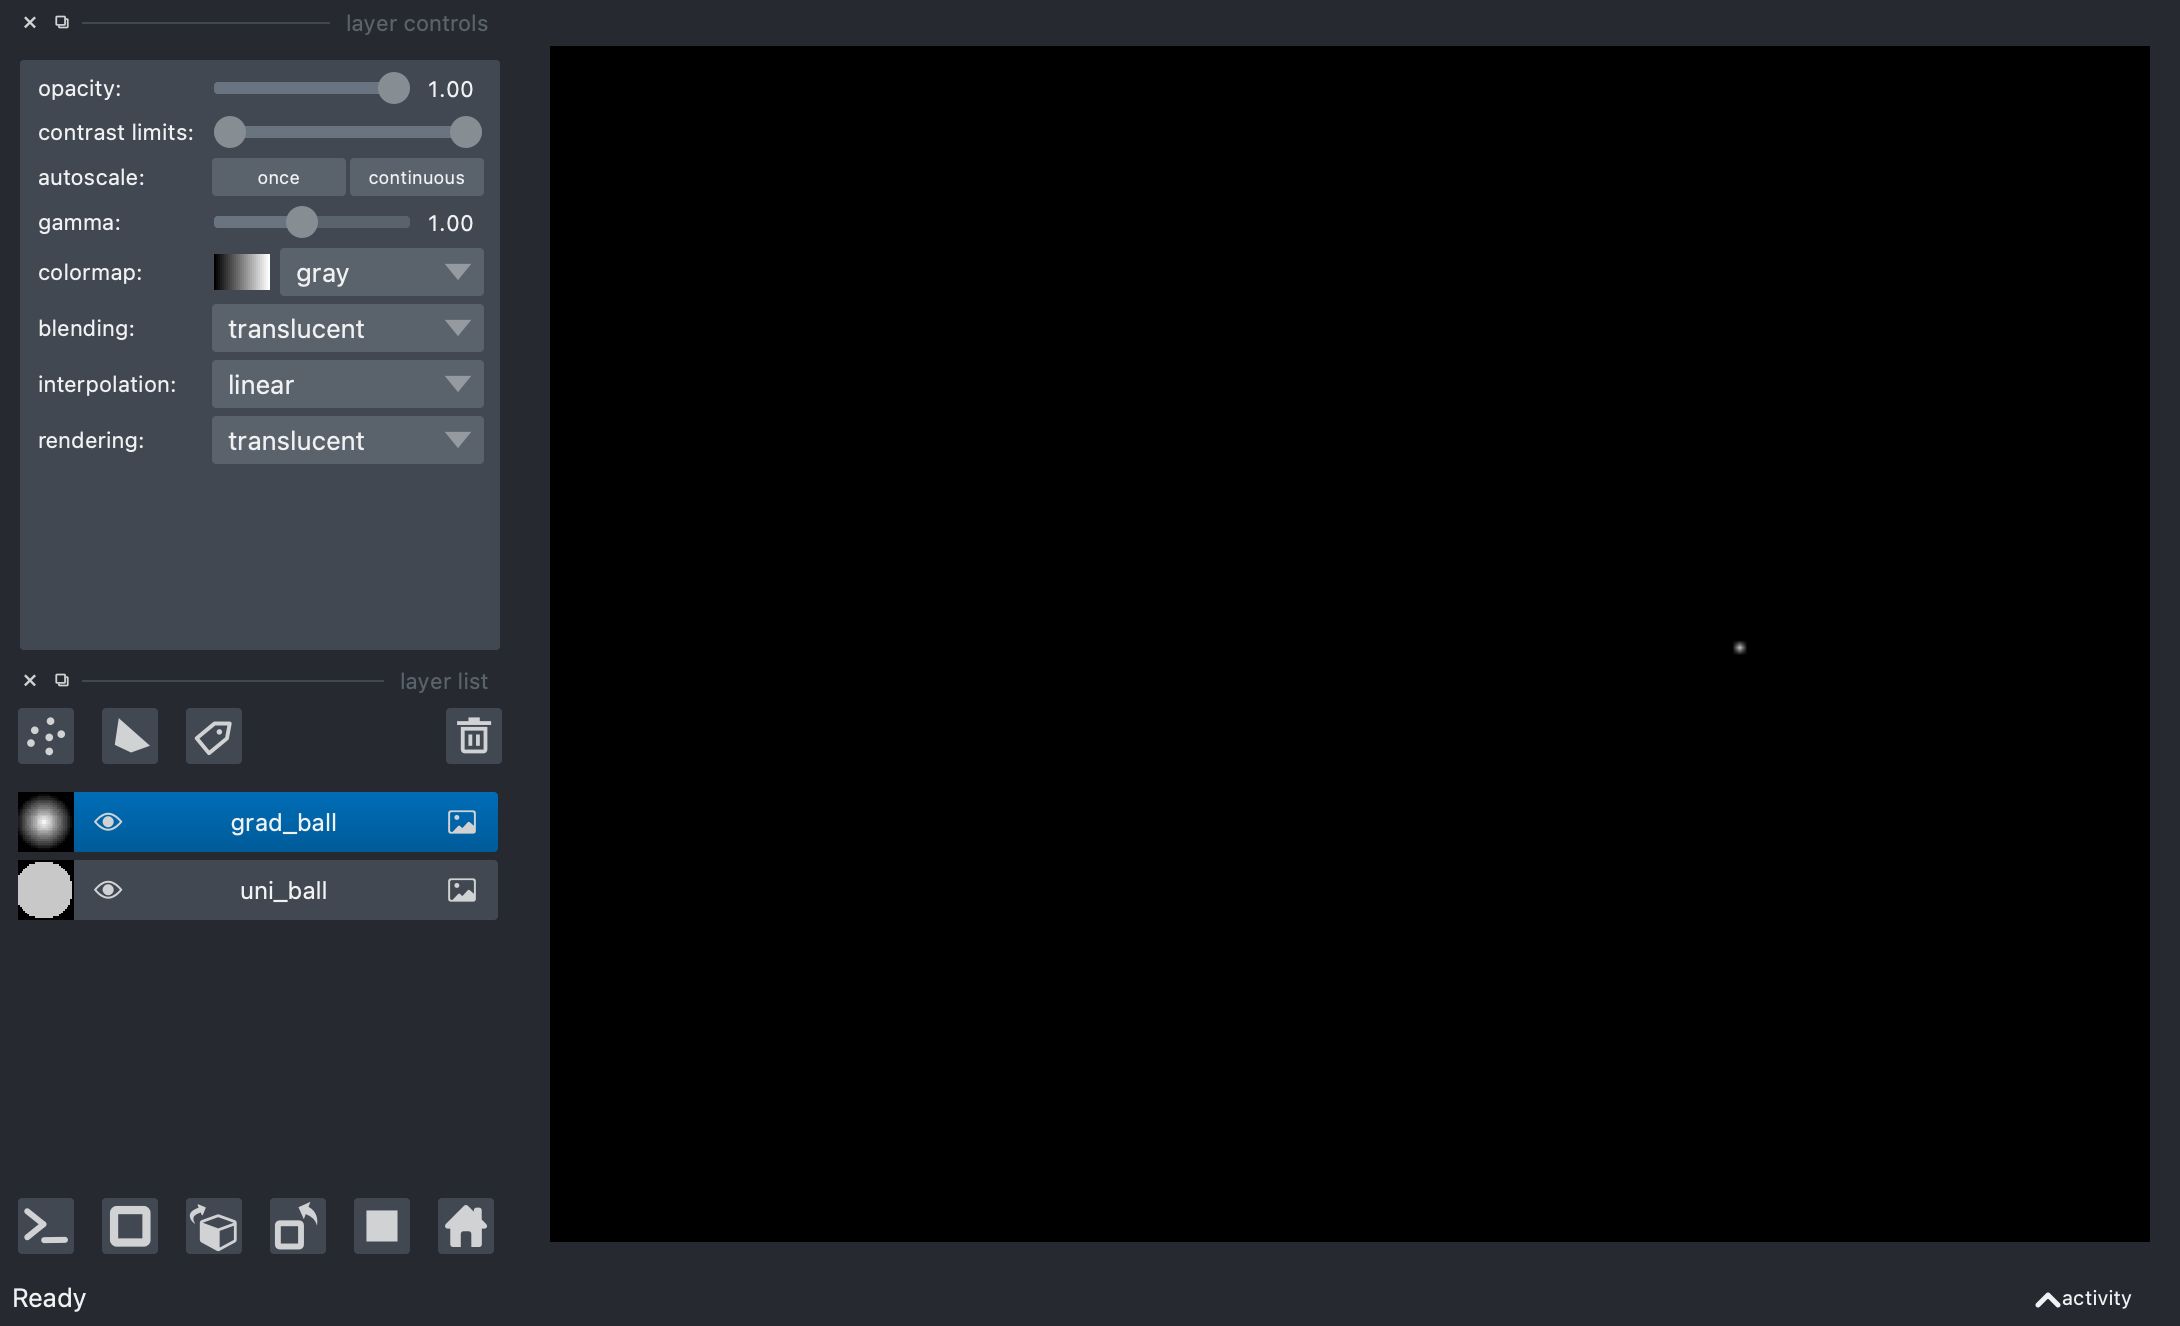

In [24]:
viewer = napari.Viewer(ndisplay=3)
uni = viewer.add_image(uni_ball, name='uni_ball', colormap='gray')
grad = viewer.add_image(grad_ball, name='grad_ball', colormap='gray')
viewer.grid.enabled = True
uni.rendering = 'translucent'
grad.rendering = 'translucent'
nbscreenshot(viewer)

#pretty poor result, why?

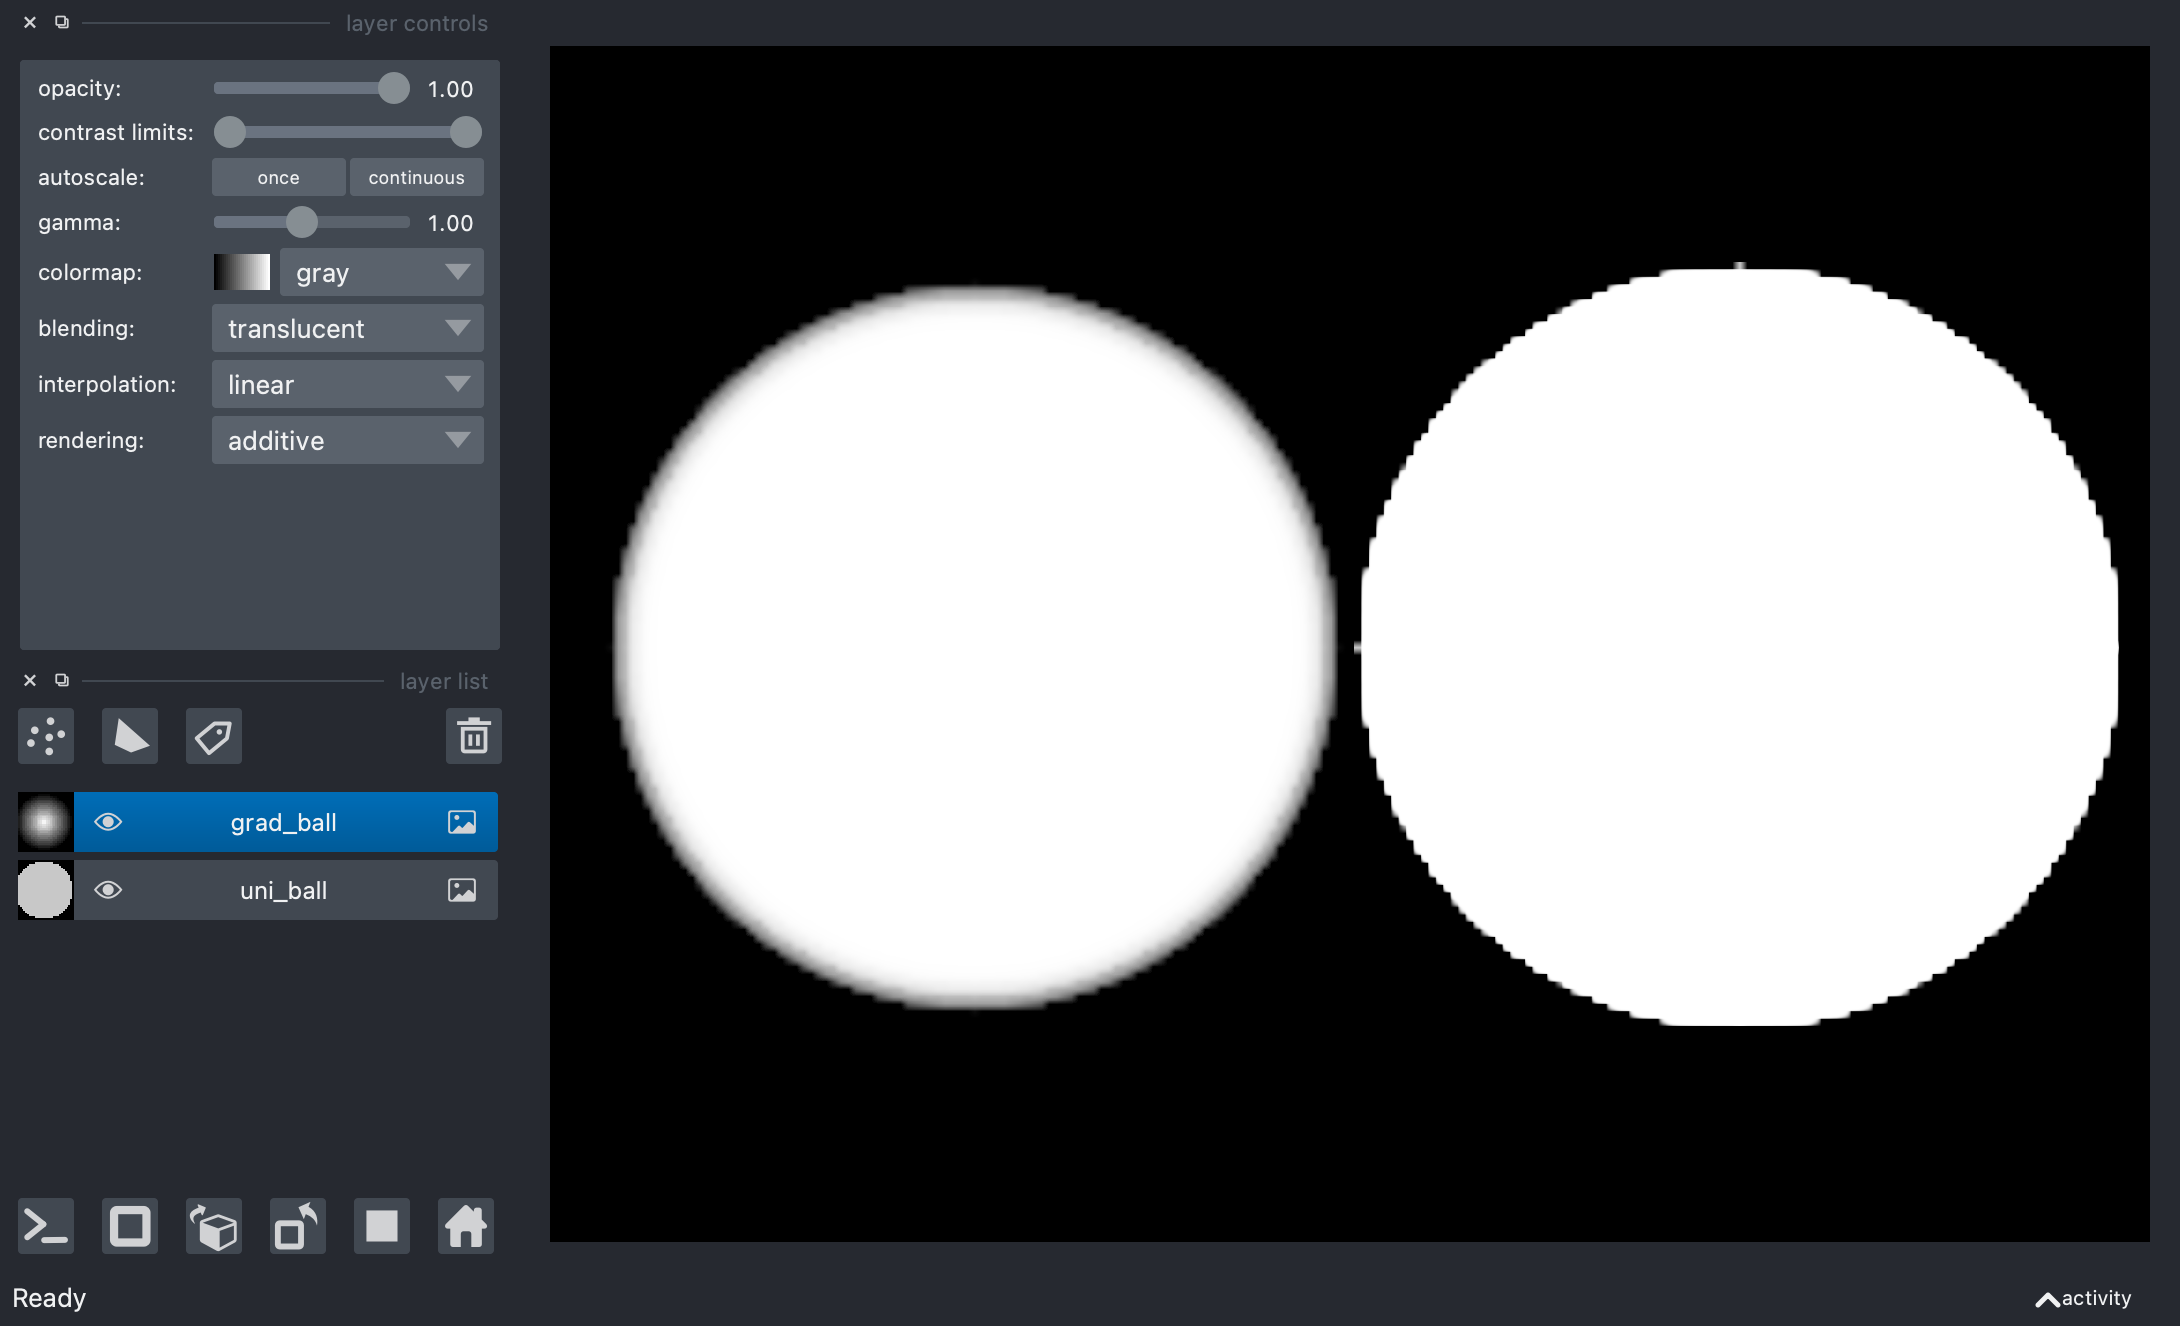

In [25]:
uni.rendering = 'additive'
grad.rendering = 'additive'
nbscreenshot(viewer)

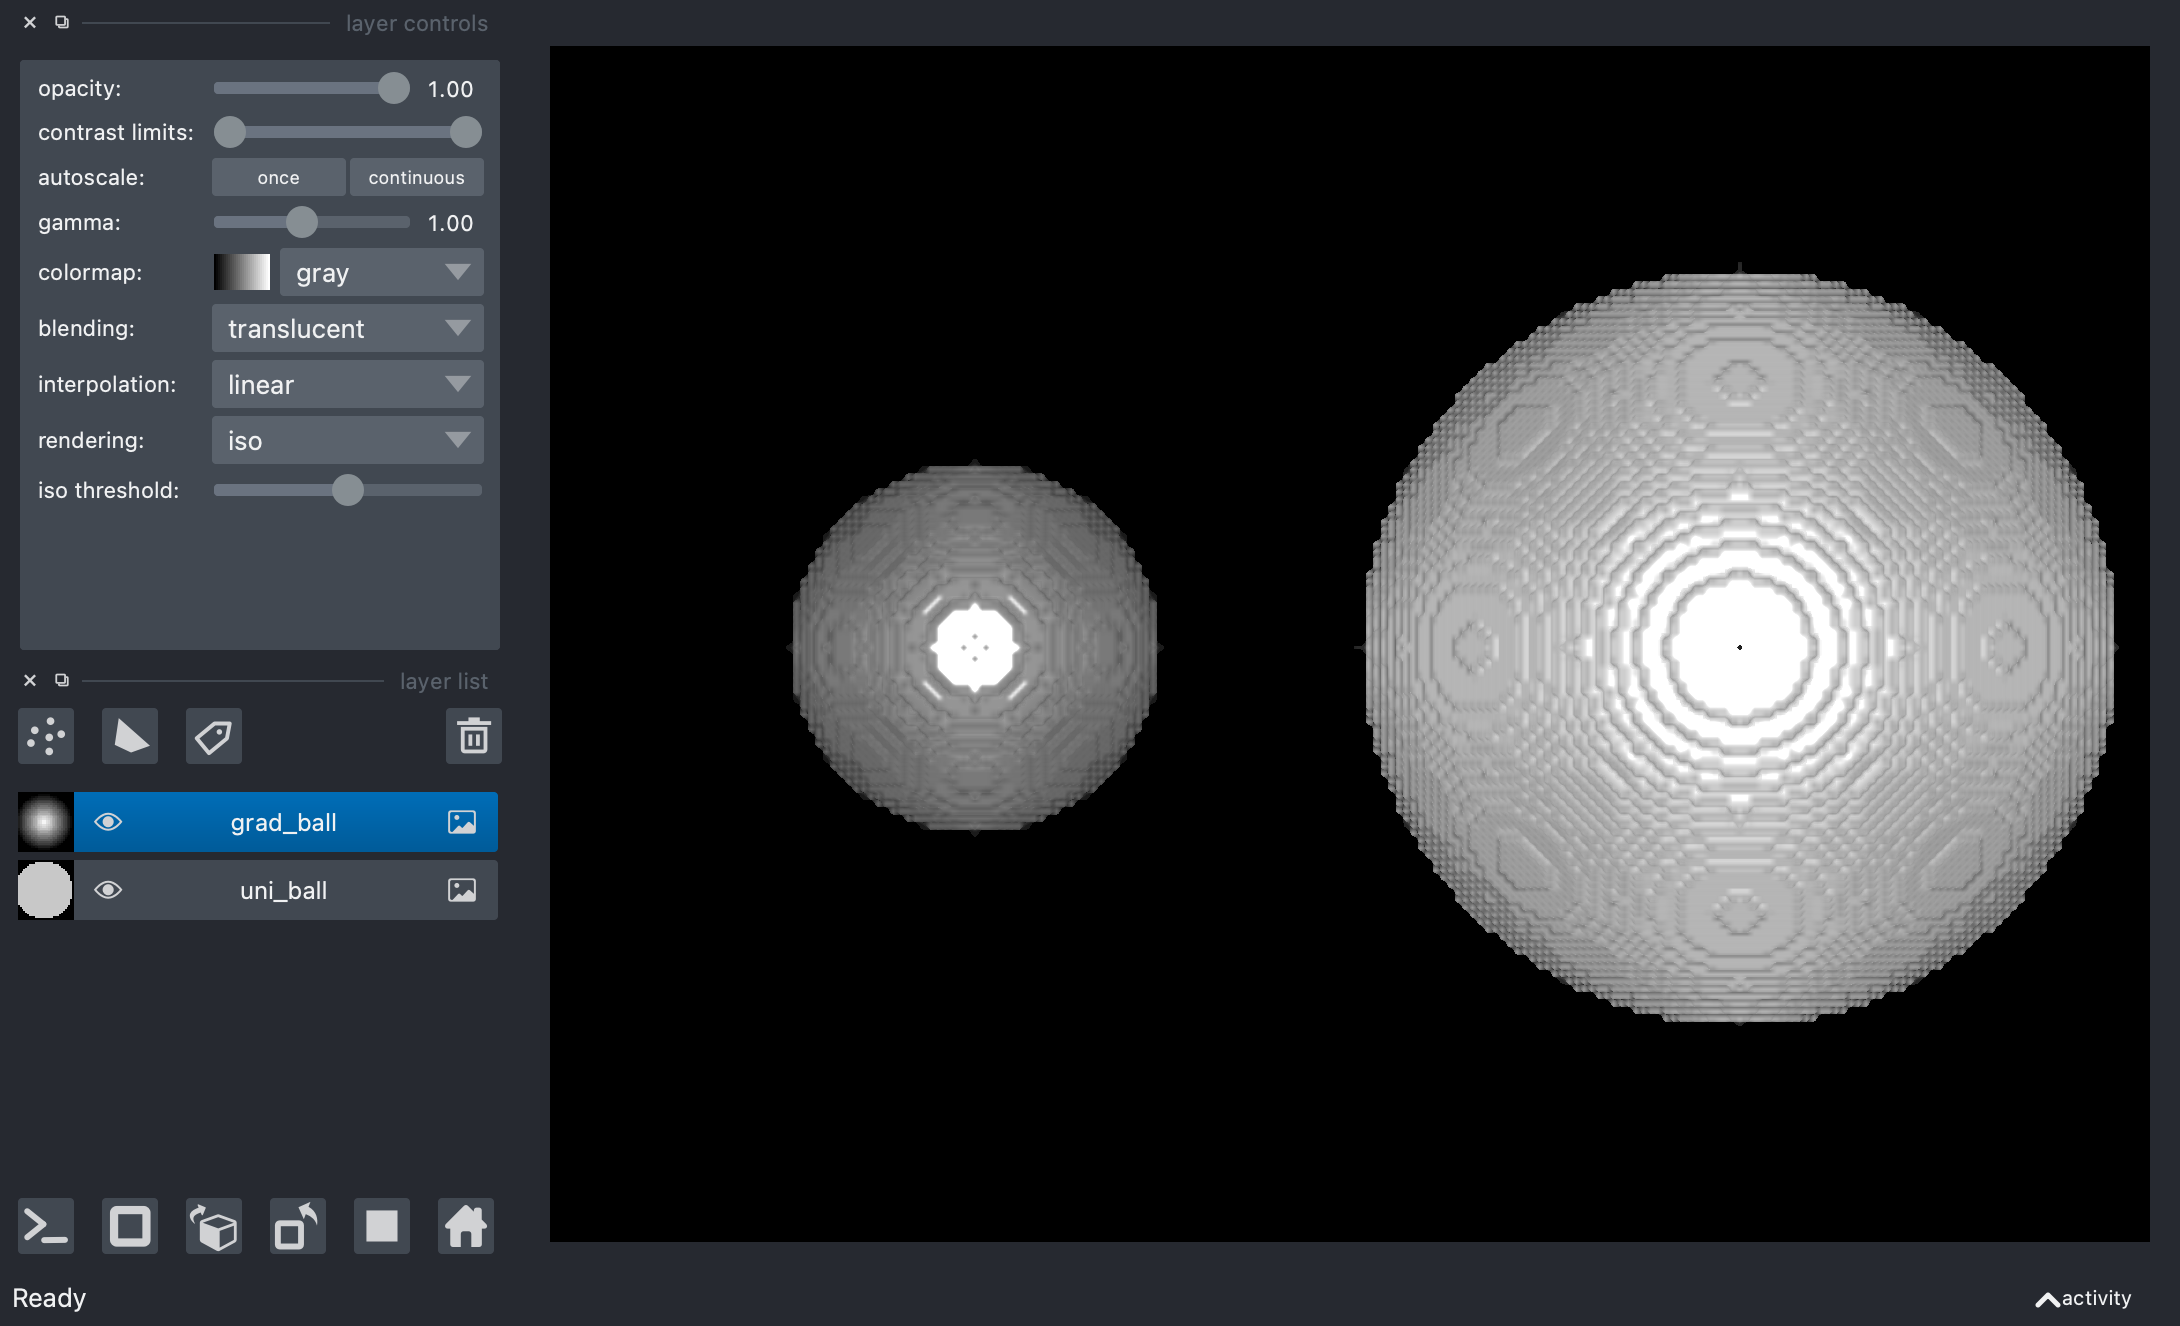

In [26]:
uni.rendering = 'iso'
grad.rendering = 'iso'
nbscreenshot(viewer)

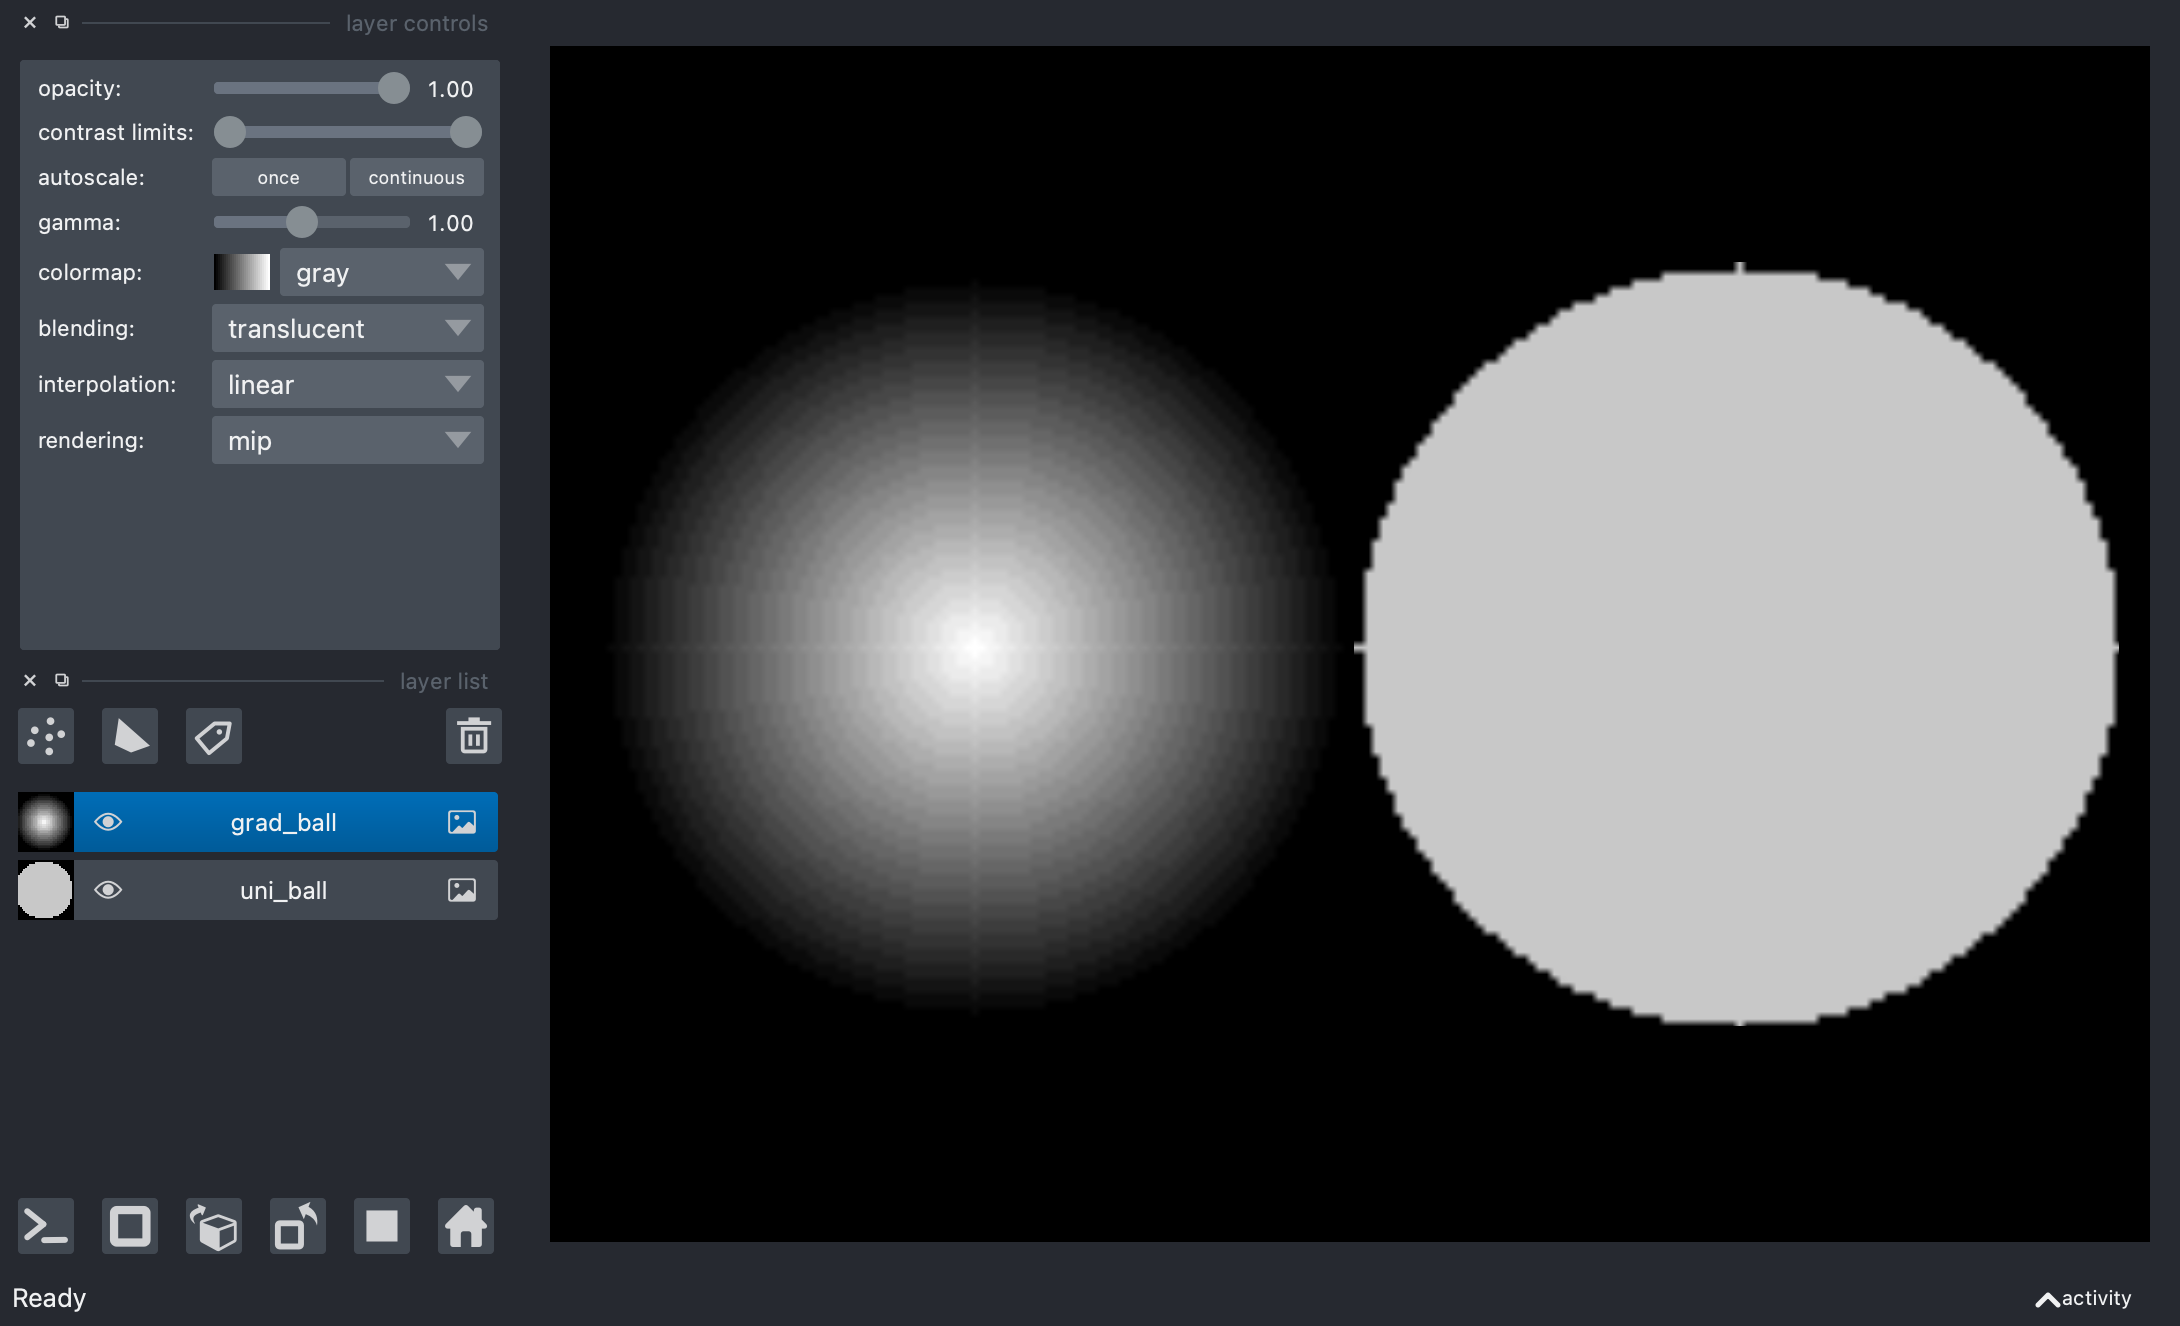

In [27]:
uni.rendering = 'mip'
grad.rendering = 'mip'
nbscreenshot(viewer)

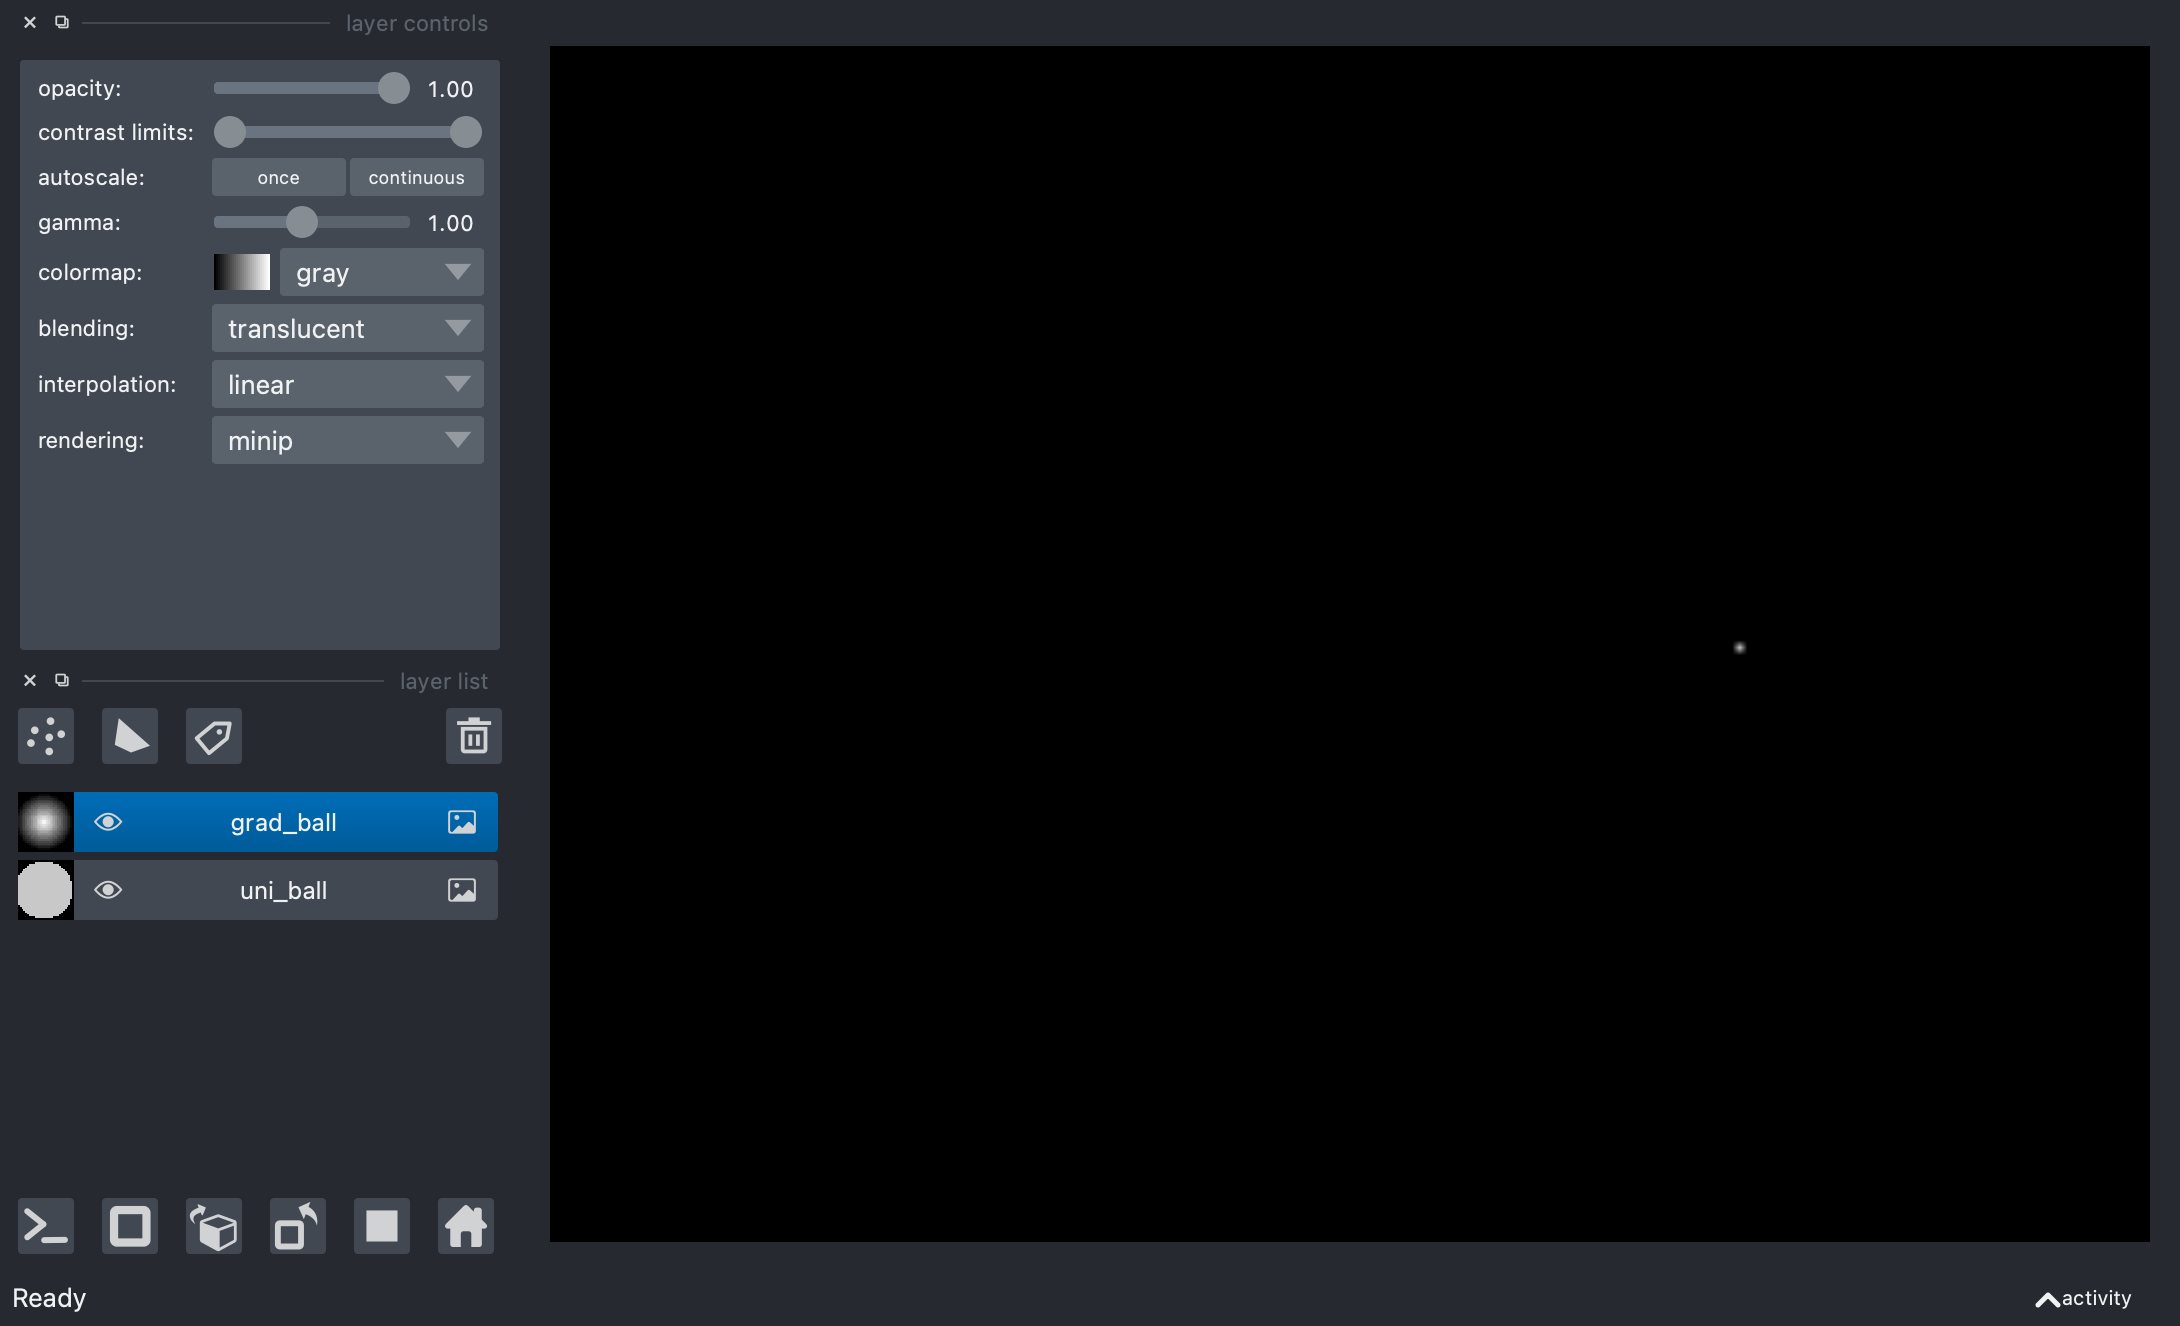

In [28]:
uni.rendering = 'minip'
grad.rendering = 'minip'
nbscreenshot(viewer)

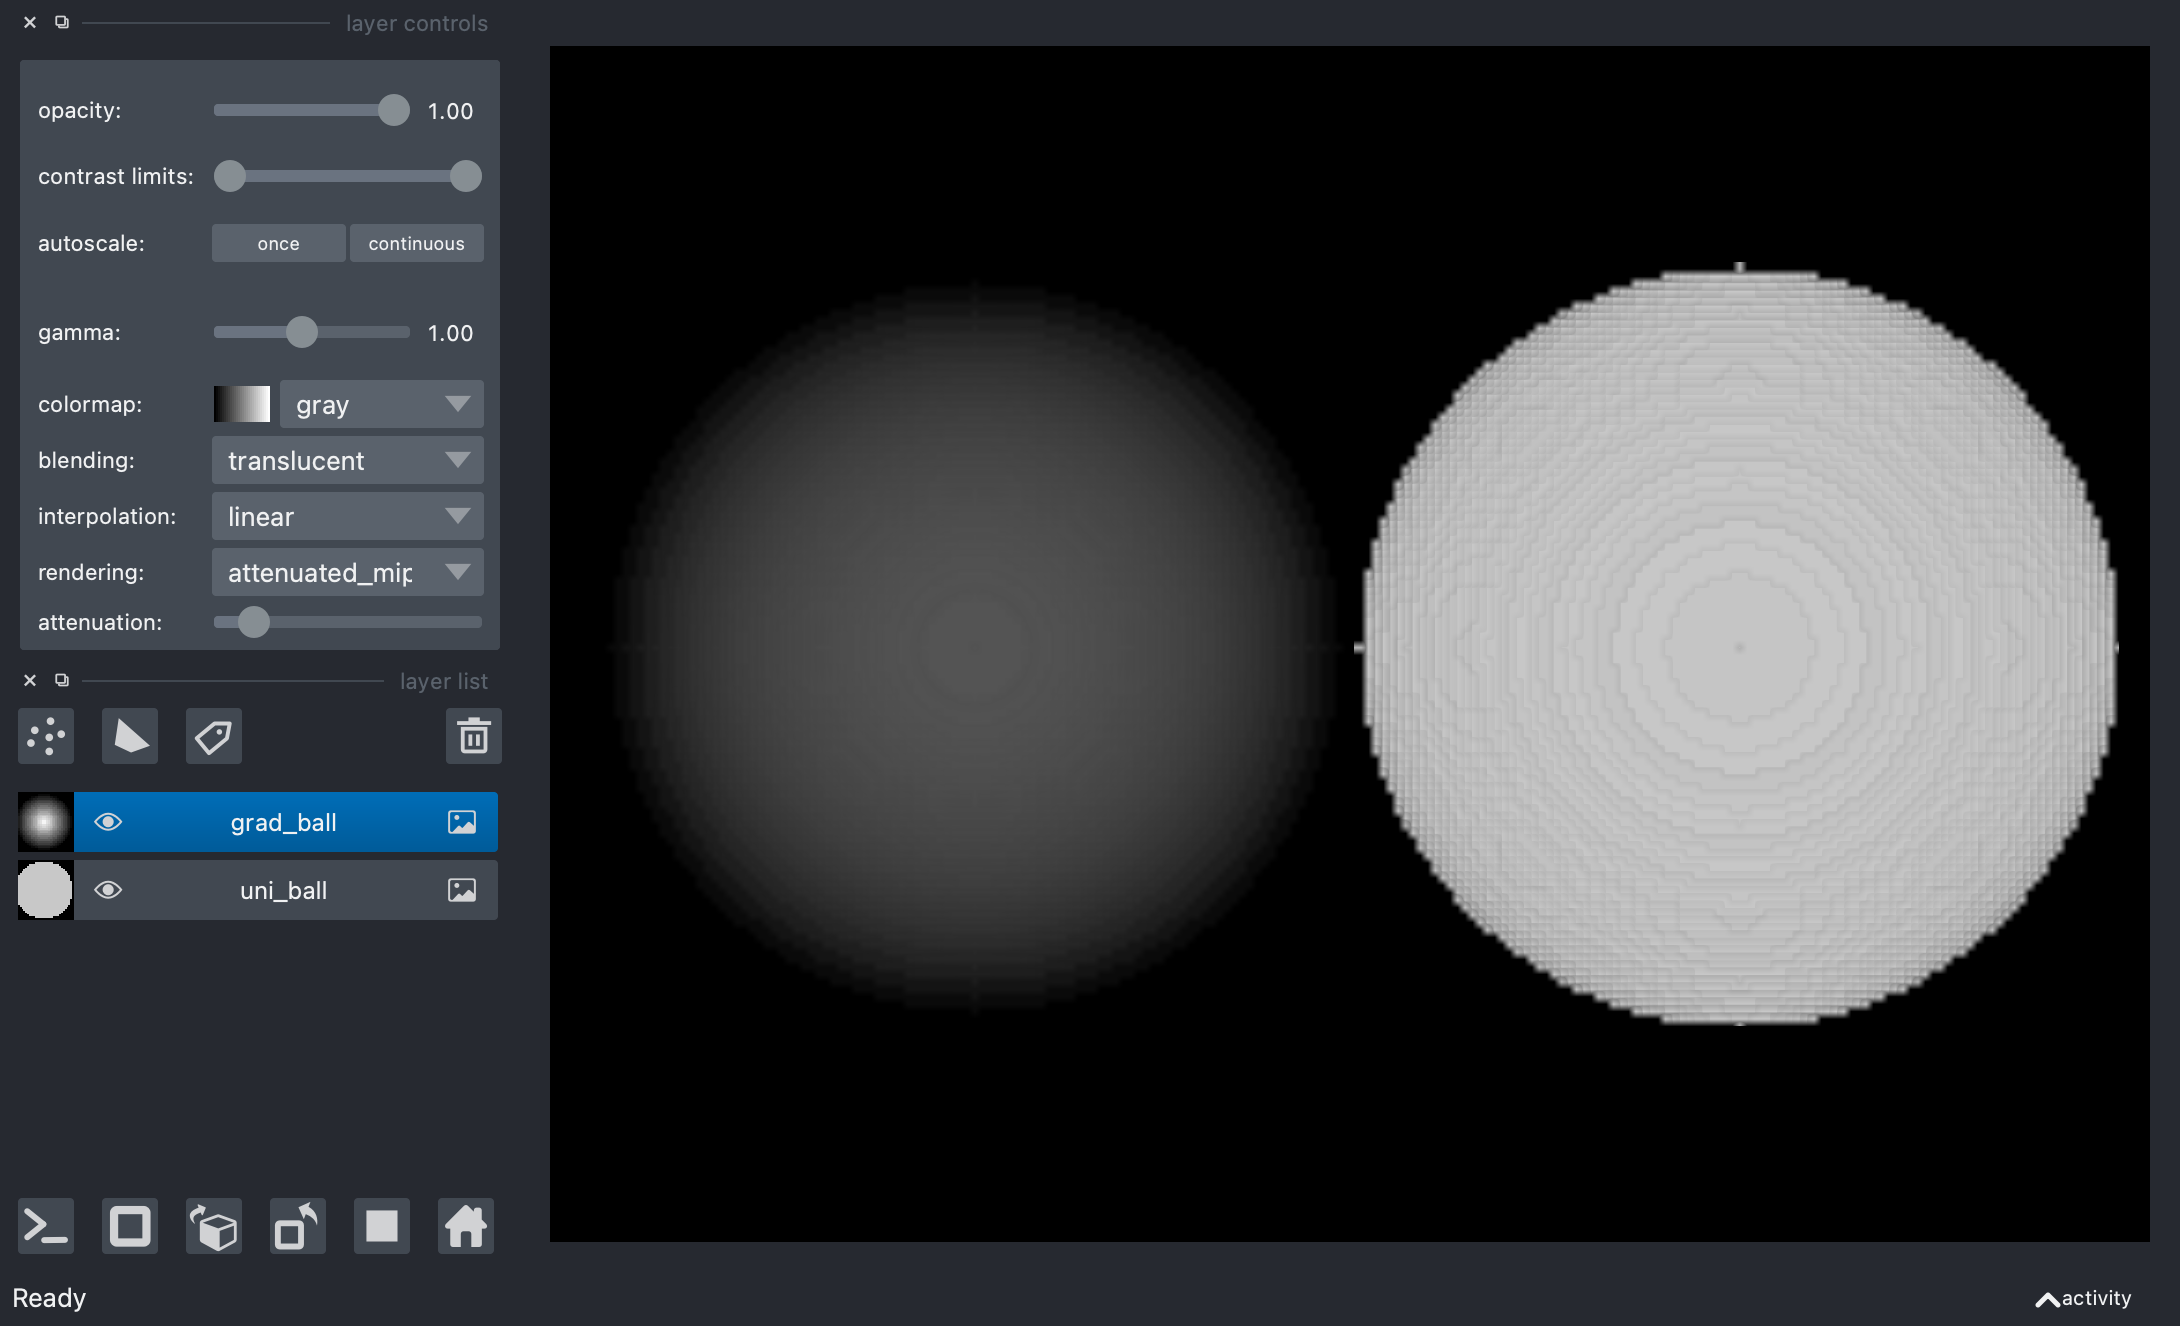

In [29]:
uni.rendering = 'attenuated_mip'
grad.rendering = 'attenuated_mip'
nbscreenshot(viewer)
# default setting for grad_ball not good, why?

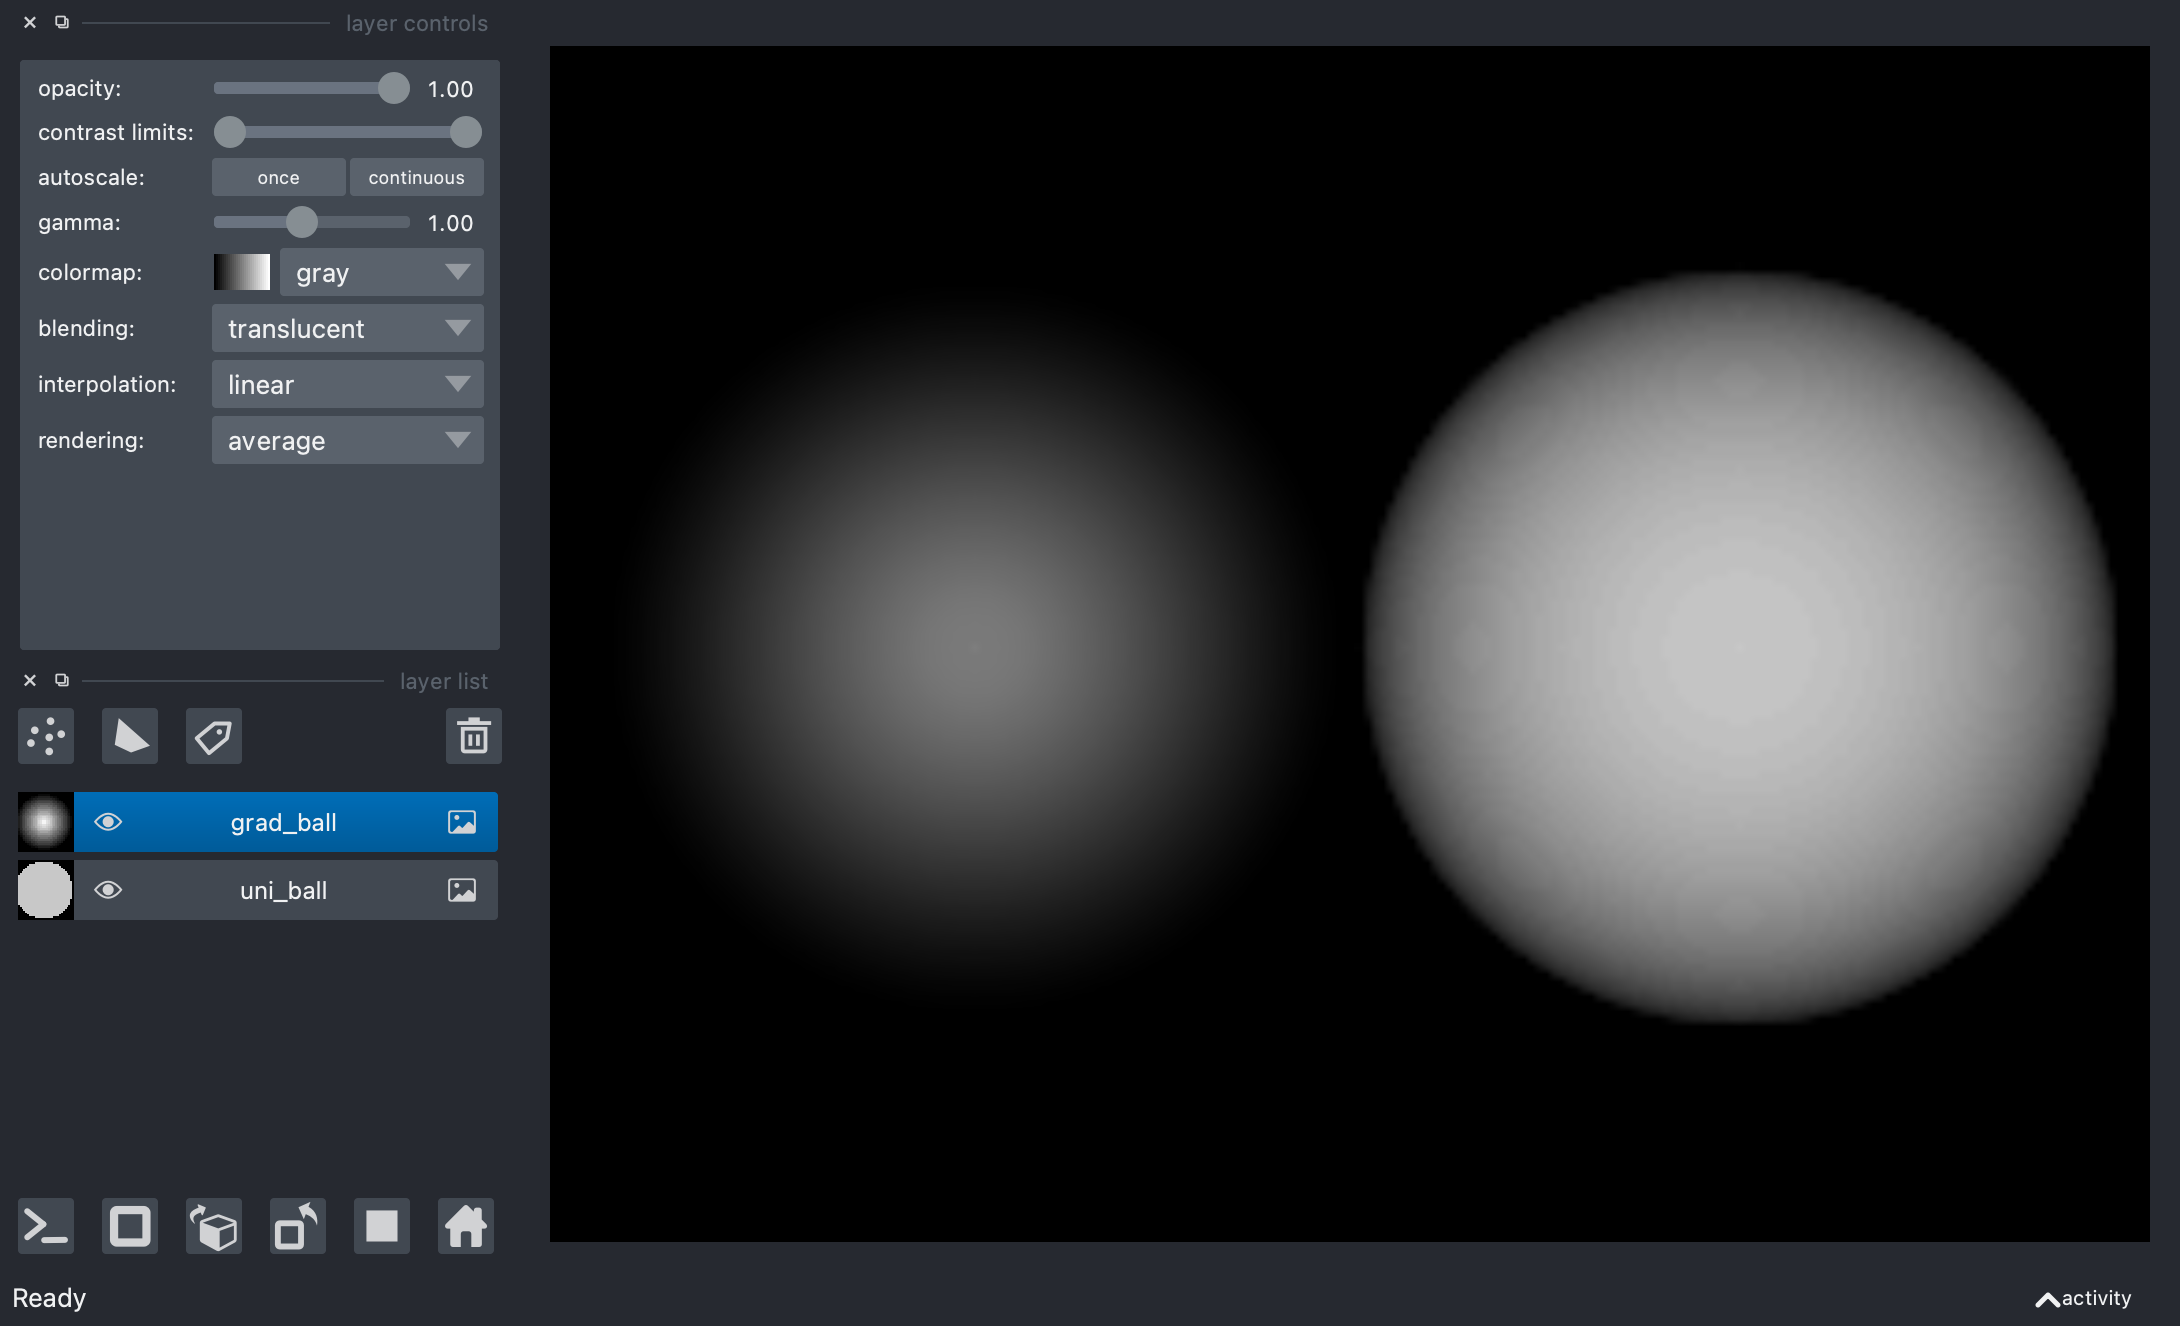

In [30]:
uni.rendering = 'average'
grad.rendering = 'average'
nbscreenshot(viewer)
# Rendering with average could be hard to interpret. 
# The "lower intensity" can be due to an object of same thickness but different intensity,
# or, in the case of uni_ball same intenstiy but different thickness. 

## Blending
Determines how RGB and alpha values get mixed.
affects multi-channel (multi-layer).

Caution: When layers are set with different blending modes, the layer on the top takes the precedence.

### translucent
Allows for multiple layers to be blended with different opacity.

### additive
Allows for multiple layers to be blended together with different colors and opacity.

### opaque
Allows for only the top layer to be visible. 

* API reference: https://napari.org/api/stable/napari.layers.Image.html?highlight=blending#napari.layers.Image.blending
 

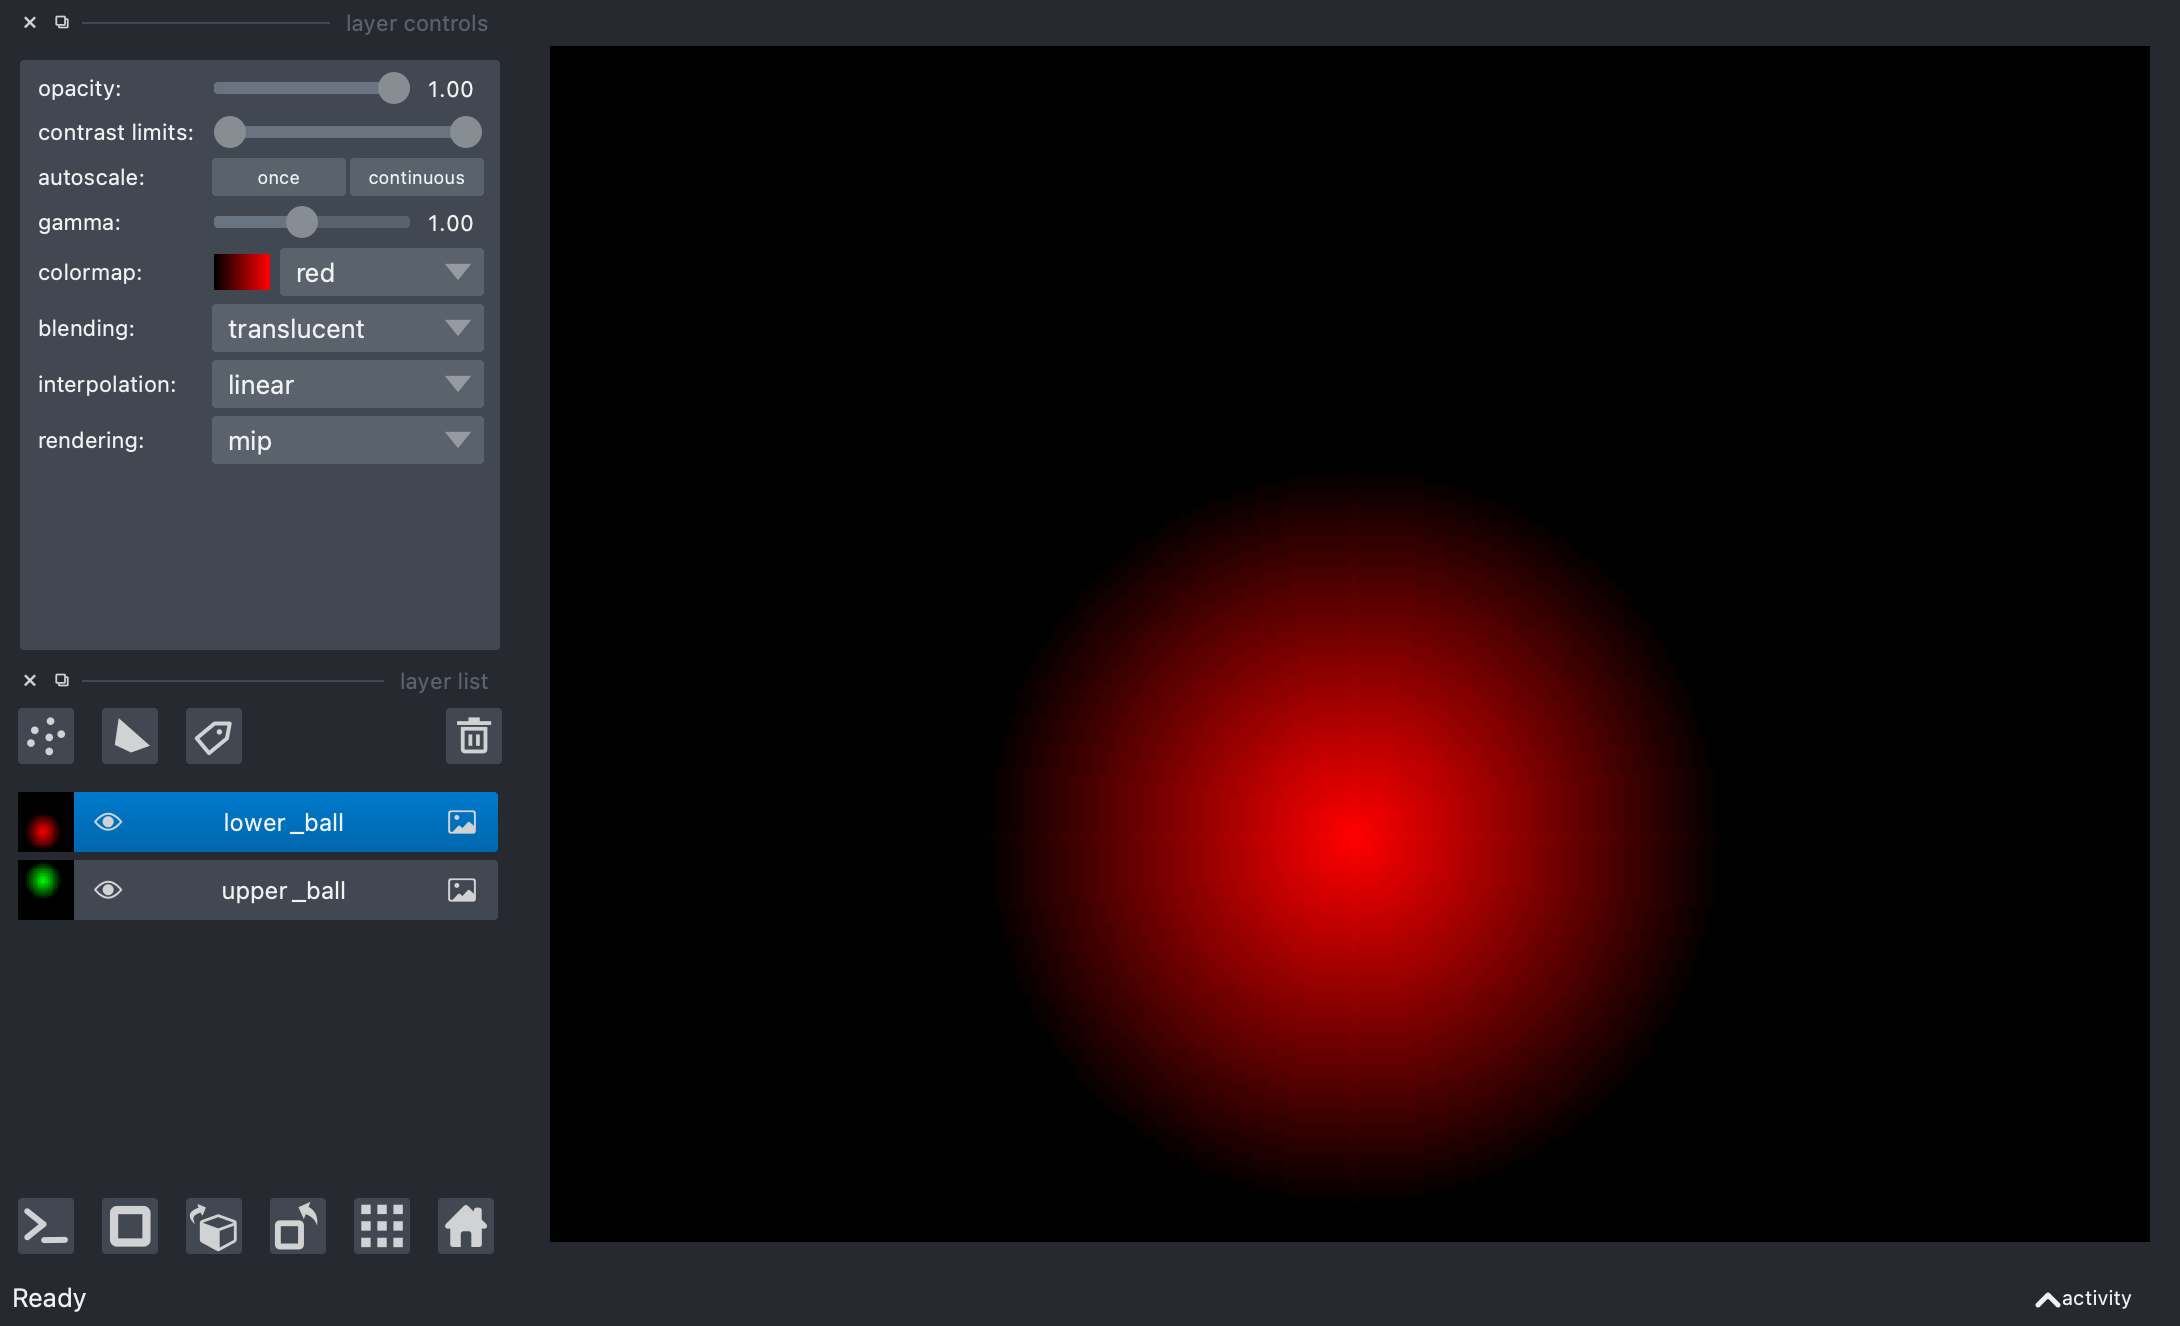

In [31]:
viewer = napari.Viewer(ndisplay=3)
viewer.grid.enabled = False
uball = viewer.add_image(u_ball, name='upper_ball', colormap='green',rendering='mip',interpolation='nearest')
lball = viewer.add_image(l_ball, name='lower_ball', colormap='red',rendering='mip',interpolation='nearest')

uball.blending = 'translucent'
lball.blending = 'translucent'
nbscreenshot(viewer)
# why upper_ball doesn't show up?

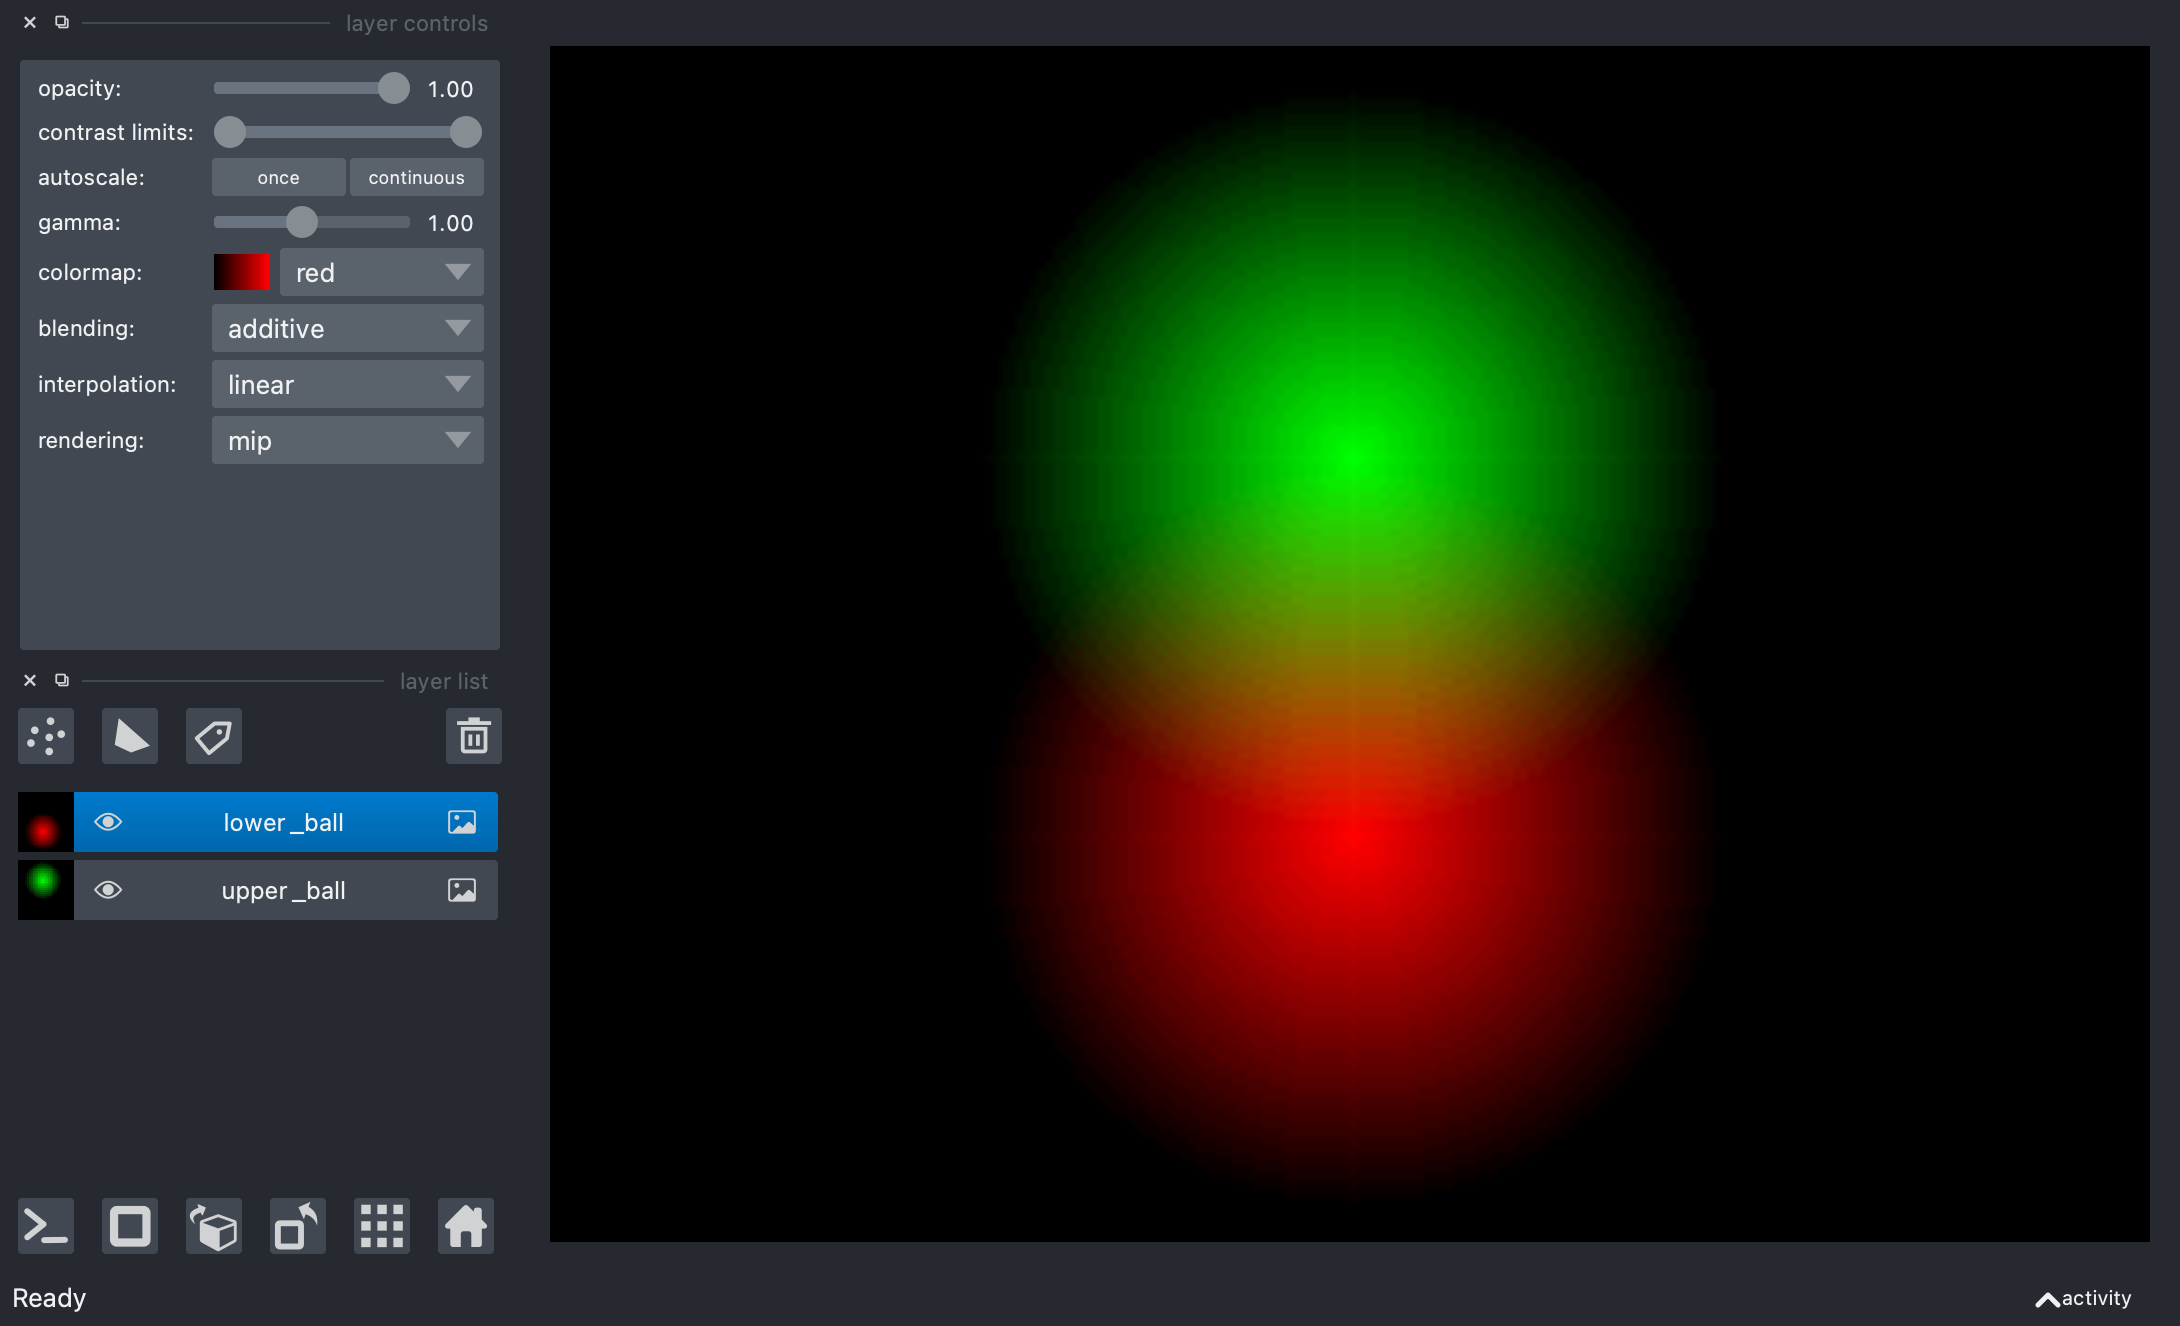

In [32]:
uball.blending = 'additive'
lball.blending = 'additive'
nbscreenshot(viewer)

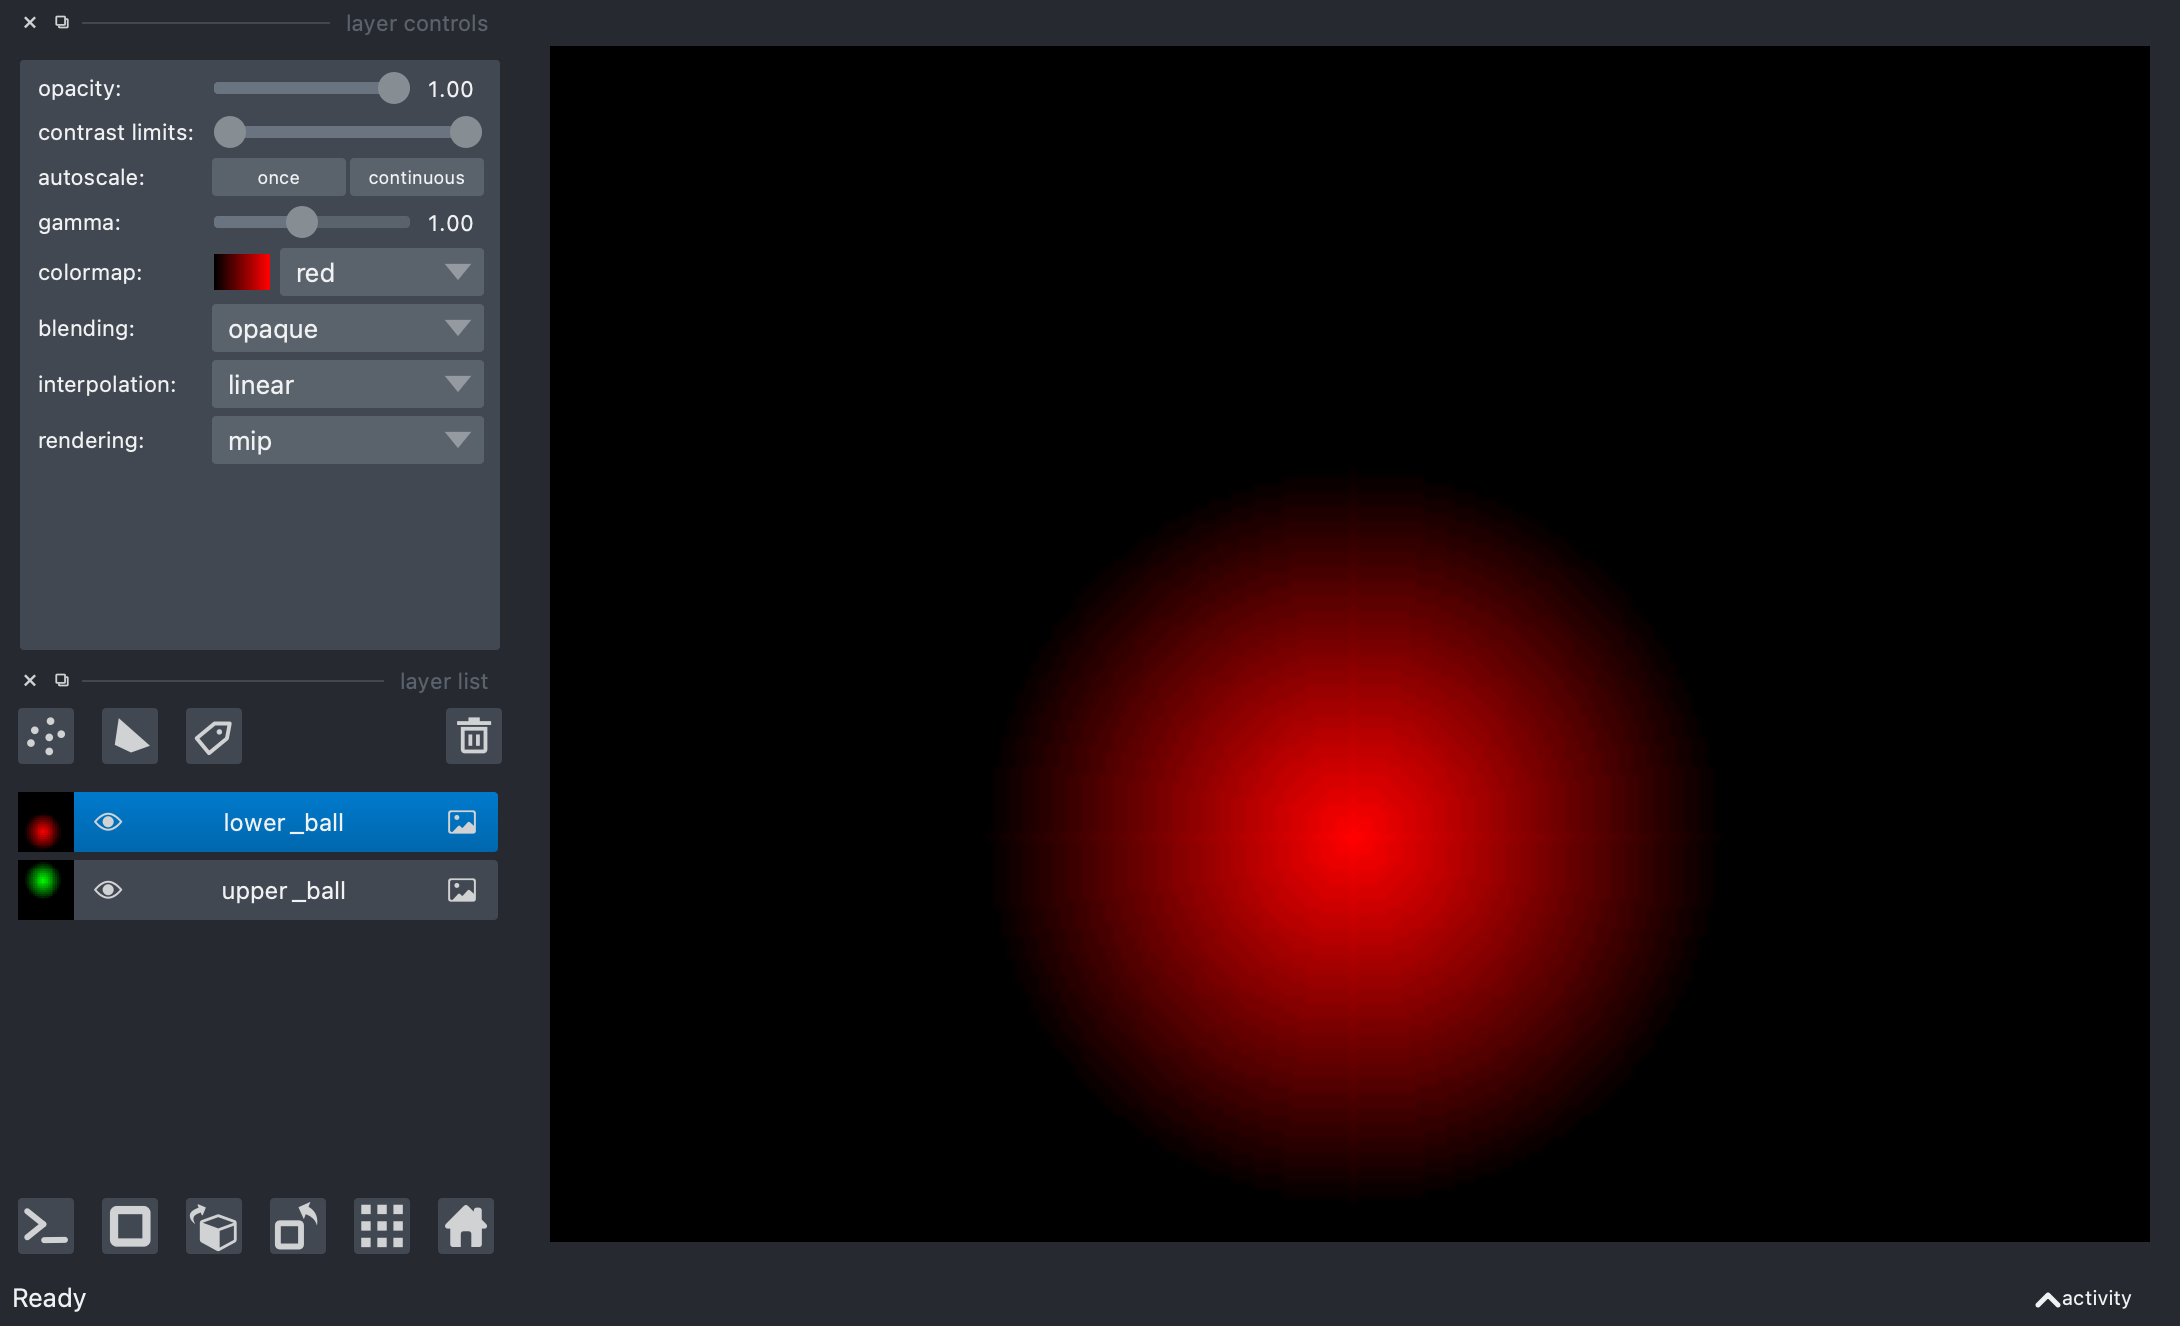

In [33]:
uball.blending = 'opaque'
lball.blending = 'opaque'
nbscreenshot(viewer)